In [1]:
from UtilDatasetPrepFromLORE import *
from Rankers import *
from PreferentialSampling import *
from UniformSampling import *
from StandardEval import *
from FairnessEval import *
from Explainers import *

22-Jan-03 11:56:38 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


# ADULT

## Uniform Sampling

In [2]:
path_res = '/Users/Marta/FAccT/Res-ADULT/'
path_data = 'datasets/'
filename = 'adult.csv'
sensitive = ['sex'] #OR 'race','marital-status'
df = prepare_adult_dataset(filename, path_data, sensitive)
df

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


target  age  workclass  education  marital-status  occupation  \
0           0   39          6          9               4           0   
1           0   50          5          9               2           3   
2           0   38          3         11               0           5   
3           0   53          3          1               2           5   
4           0   28          3          9               2           9   
...       ...  ...        ...        ...             ...         ...   
32556       0   27          3          7               2          12   
32557       1   40          3         11               2           6   
32558       0   58          3         11               6           0   
32559       0   22          3         11               4           0   
32560       1   52          4         11               2           3   

       relationship  race  capital-gain  capital-loss  hours-per-week  \
0                 1     4          2174             0              40   
1                 0     4             0             0              13   
2                 1     4             0             0              40   
3                 0     2             0             0              40   
4                 5     2             0             0              40   
...             ...   ...           ...           ...             ...   
32556             5     4             0             0              38   
32557             0     4             0             0              40   
32558             4     4             0             0              40   
32559             3     4             0             0              20   
32560             5     4         15024             0              40   

       native-country  sex_Female  sex_Male  
0                  38           0         1  
1                  38           0         1  
2                  38           0         1  
3                  38           0         1  
4                   4           1         0  
...               ...         ...       ...  
32556              38           1         0  
32557              38           0         1  
32558              38           1         0  
32559              38           0         1  
32560              38           1         0  

[32561 rows x 14 columns]

In [3]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['<=50K','>50K']
# dictionary={'<=50K': 0, '>50K': 1}
adClass=1
disClass=0
protected = ['sex_Female','sex_Male']#['race_Amer-Indian-Eskimo','race_Asian-Pac-Islander','race_Black','race_Other','race_White']
protected_feature='sexes'#'races' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr='sex_Male'
disAttr='sex_Female'

In [4]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [5]:
X_test = pd.DataFrame(X_test, columns=column_names)
X_test = X_test.sample(1000)
y_test = y_test[X_test.index]
X_test = X_test.values

In [6]:
findFreq(target,protected,df)

({'sex_Female': 6721, 'sex_Male': 10592},
 {'sex_Female': 799, 'sex_Male': 4680})

In [7]:
df_new=UniformSampling(target,protected,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'sex_Female': 6721, 'sex_Male': 10592}
Counting labels = 1  {'sex_Female': 799, 'sex_Male': 4680}
DN  ('sex_Female', 6721)
FP  ('sex_Male', 4680)
DP  ('sex_Female', 799)
FN  ('sex_Male', 10592)
Len DN_df  6721
Len FP_df  4680
Len DP_df  799
Len FN_df  10592


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Len restData 0
DN_expected  5712
1009 to be removed
Len DN_df after sampling  5712
FP_expected  3671
1009 to be removed
Len FP_df after sampling  3671
DP_expected  1808
1009 to add
Len DP_df after sampling  1808
FN_expected  11601
1009 to add
Len FN_df after sampling  11601


In [8]:
findFreq(target,protected,df_new)

({'sex_Female': 5712, 'sex_Male': 11601},
 {'sex_Female': 1808, 'sex_Male': 3671})

In [9]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,False)

### MLP

In [10]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [11]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_MLP_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 1000


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 663 ] Labeled as + class: [ 160 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 337 ] Labeled as + class: [ 41 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 663 ] Labeled as + class: [ 120 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 337 ] Labeled as + class: [ 58 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 663 ] Labeled as + class: [ 98 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 337 ] Labeled as + class: [ 31 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 663 ] Labeled as + class: [ 154 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 337 ] Labeled as + class: [ 73 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.810000            0.805000       0.781000   
Precision           0.631824            0.632941       0.561483   
Recall              0.561143            0.480816       0.545469   
F1 Score            0.590268            0.537582       0.546165   
Discrimination      0.119666            0.055825       0.008889   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.788000        CLF Original    0.005000   
Precision                  0.588449  CLF Original Blind    0.001117   
Recall                     0.459429        CLF Original    0.080327   
F1 Score                   0.513585        CLF Original    0.052686   
Discrimination             0.015660       CLF Mitigated    0.063841   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.007000   0.029000     0.017000  
Precision         0.026966   0.070341     0.044493  
Recall            0.086041   0.015673     0.021388  
F1 Score          0.032580   0.044103     0.023997  
Discrimination    0.006772   0.110777     0.040165

In [12]:

PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [13]:
PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [14]:
res = pd.read_csv(path_res+'US_MLP_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.810000            0.805000       0.781000   
Precision           0.631824            0.632941       0.561483   
Recall              0.561143            0.480816       0.545469   
F1 Score            0.590268            0.537582       0.546165   
Discrimination      0.119666            0.055825       0.008889   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.788000        CLF Original    0.005000   
Precision                  0.588449  CLF Original Blind    0.001117   
Recall                     0.459429        CLF Original    0.080327   
F1 Score                   0.513585        CLF Original    0.052686   
Discrimination             0.015660       CLF Mitigated    0.063841   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.007000   0.029000     0.017000  
Precision         0.026966   0.070341     0.044493  
Recall            0.086041   0.015673     0.021388  
F1 Score          0.032580   0.044103     0.023997  
Discrimination    0.006772   0.110777     0.040165

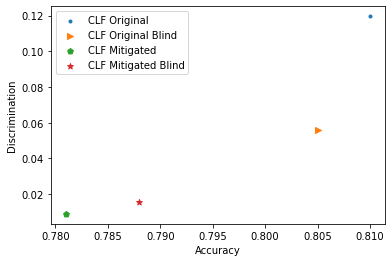

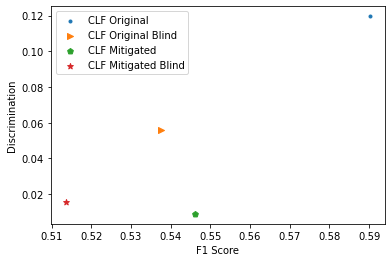

In [15]:
plotDisc(res)

In [16]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 337 instances.
    * "('sex_Male',)" grouping has 663 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 297 data points.
        - The class *>50K* has 40 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 457 data points.
        - The class *>50K* has 206 data points.


In [17]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:


{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

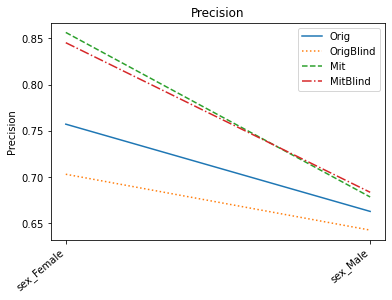

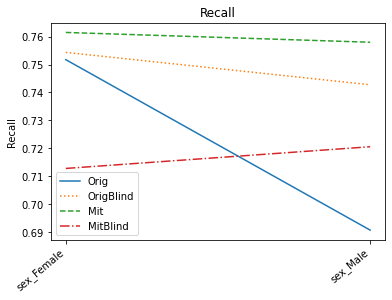

In [18]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [19]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [20]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [21]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [22]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -34.768674          -39.497125      -40.088367   
workclass                   0.917746            3.117075        3.274115   
education                 -21.391402          -29.148693      -24.639496   
marital-status            -27.700557          -42.459067      -32.422653   
occupation                 -4.876776           -7.354781       -7.458465   
relationship               63.264054           14.863312       34.430413   
race                       -0.569172            0.067027       -0.160749   
capital-gain             -354.570817         -299.302498     -298.111271   
capital-loss              -58.780559          -90.289239      -82.043268   
hours-per-week             -1.899996           -1.589715       -2.422856   
native-country             -7.699206           -8.064359       -8.891799   
sex_Female                  1.954875            0.228760        2.181409   
sex_Male                    1.185654           -0.335149        0.882504   

                clfOrigBlind-clfMitBlind  
age                           -34.177433  
workclass                       0.760705  
education                     -25.900598  
marital-status                -37.736972  
occupation                     -4.773092  
relationship                   43.696953  
race                           -0.341396  
capital-gain                 -355.762044  
capital-loss                  -67.026530  
hours-per-week                 -1.066854  
native-country                 -6.871766  
sex_Female                      0.002226  
sex_Male                       -0.031999

In [23]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.028543            0.022981        0.020630   
workclass                   0.002230            0.004154        0.003852   
education                   0.008310            0.008514        0.007110   
marital-status              0.010918            0.017581        0.015570   
occupation                  0.004696            0.005967        0.005132   
relationship                0.017731            0.028346        0.019340   
race                        0.001603            0.001730        0.001654   
capital-gain                0.056424            0.062194        0.060743   
capital-loss                0.015305            0.014442        0.024562   
hours-per-week              0.012179            0.014440        0.011397   
native-country              0.005860            0.004683        0.005312   
sex_Female                  0.010211            0.005024        0.015103   
sex_Male                    0.004968            0.009748        0.014707   

                clfOrigBlind-clfMitBlind  
age                             0.030499  
workclass                       0.002576  
education                       0.010266  
marital-status                  0.035299  
occupation                      0.004463  
relationship                    0.052874  
race                            0.001730  
capital-gain                    0.055902  
capital-loss                    0.026172  
hours-per-week                  0.016884  
native-country                  0.003933  
sex_Female                      0.000474  
sex_Male                        0.000474

In [24]:
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.570265            0.281954        1.531957   
SA-Mean               0.007589            0.007386        0.014905   
NSA-Sum              52.403542           48.704808       48.540314   
NSA-Mean              0.014891            0.016821        0.015937   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.017112  
SA-Mean                   0.000474  
NSA-Sum                  52.555849  
NSA-Mean                  0.021872

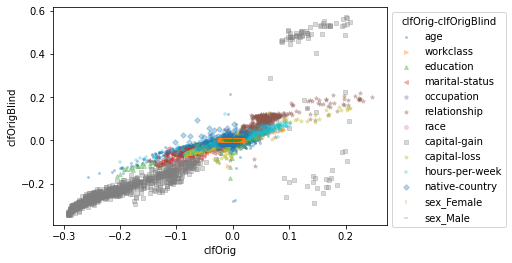

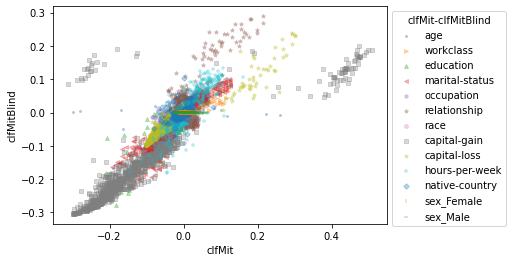

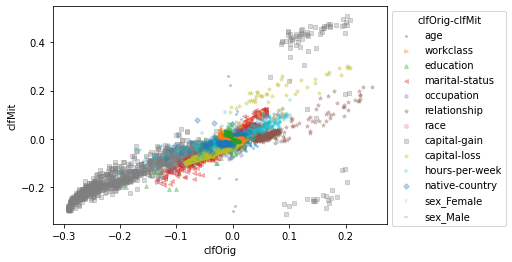

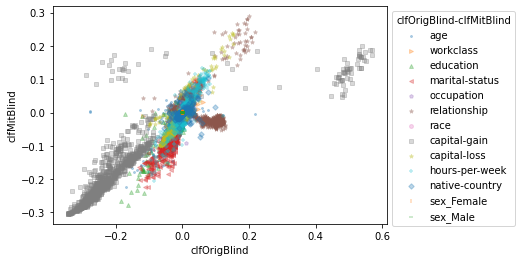

In [25]:
XAIPlots(shap_v,column_names,diffClfs=True)

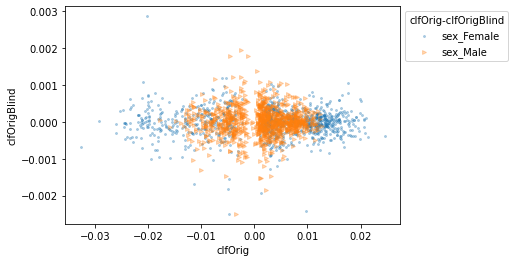

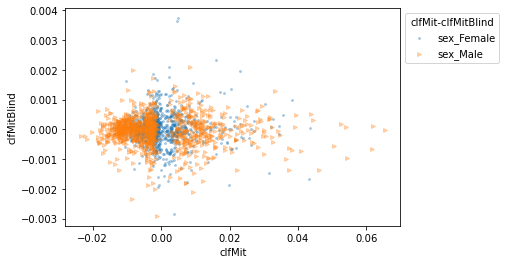

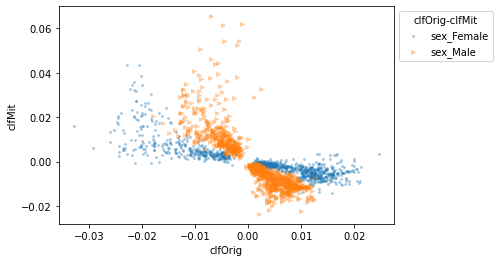

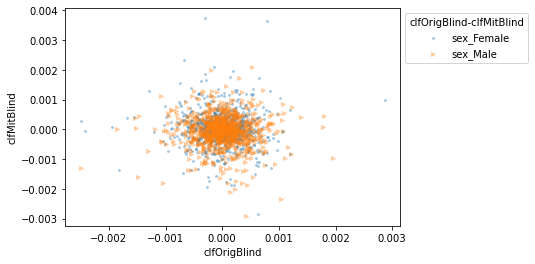

In [26]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [27]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [28]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [29]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [30]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         3.256167           -7.799893       -3.194025   
workclass                  -0.113648            0.805253        0.411968   
education                  -2.111618           -6.587173       -4.239522   
marital-status             -6.910115            3.557347       -1.892382   
occupation                 -0.867093           -1.197674       -1.097797   
relationship                9.428950            1.592984        4.744067   
race                        0.127361            0.665841        0.210799   
capital-gain             -429.937867         -279.426965     -298.436743   
capital-loss              -68.893387          -73.997745      -70.729723   
hours-per-week             -5.550079           -4.883925       -5.404388   
native-country             -6.666801           -8.935310       -4.033231   
sex_Female                  0.598247           -1.121321        0.176589   
sex_Male                    0.744231           -1.146362       -0.419115   

                clfOrigBlind-clfMitBlind  
age                            -1.349702  
workclass                       0.279638  
education                      -4.459268  
marital-status                 -1.460387  
occupation                     -0.966970  
relationship                    6.277868  
race                            0.582403  
capital-gain                 -410.928089  
capital-loss                  -72.161409  
hours-per-week                 -5.029616  
native-country                -11.568881  
sex_Female                     -0.699663  
sex_Male                        0.016984

In [31]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.021042            0.022485        0.014905   
workclass                   0.009124            0.009220        0.009383   
education                   0.010133            0.009565        0.010775   
marital-status              0.010889            0.011375        0.016132   
occupation                  0.009846            0.008924        0.009258   
relationship                0.011739            0.017127        0.009557   
race                        0.009668            0.009424        0.009554   
capital-gain                0.058080            0.130332        0.152279   
capital-loss                0.034922            0.029657        0.037099   
hours-per-week              0.016599            0.019270        0.014837   
native-country              0.015140            0.009317        0.013375   
sex_Female                  0.010940            0.009551        0.011843   
sex_Male                    0.009693            0.009959        0.011194   

                clfOrigBlind-clfMitBlind  
age                             0.029562  
workclass                       0.009621  
education                       0.010634  
marital-status                  0.026735  
occupation                      0.009747  
relationship                    0.026374  
race                            0.009497  
capital-gain                    0.080646  
capital-loss                    0.027519  
hours-per-week                  0.021595  
native-country                  0.009367  
sex_Female                      0.009748  
sex_Male                        0.009484

In [32]:
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.671239            1.133842        0.297852   
SA-Mean               0.010316            0.009755        0.011519   
NSA-Sum              48.533008           35.404556       35.854059   
NSA-Mean              0.018835            0.025154        0.027014   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.358323  
SA-Mean                   0.009616  
NSA-Sum                  46.824021  
NSA-Mean                  0.023754

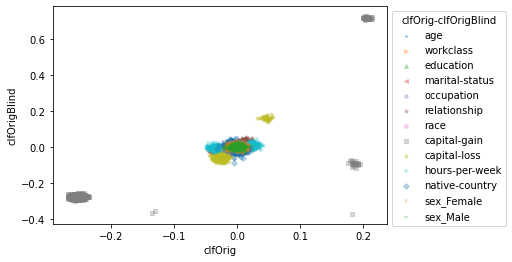

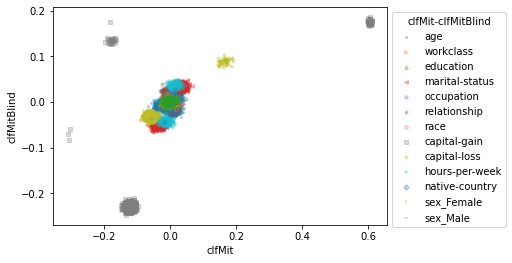

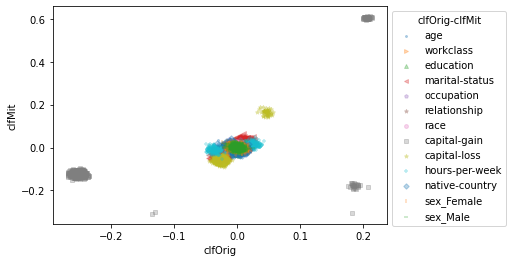

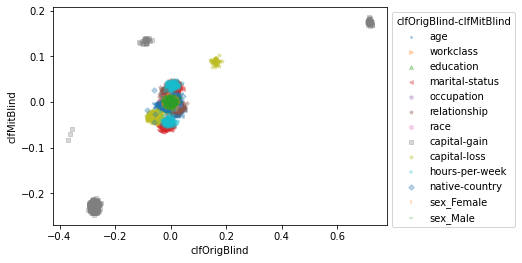

In [33]:
XAIPlots(lime_v,column_names,diffClfs=True)

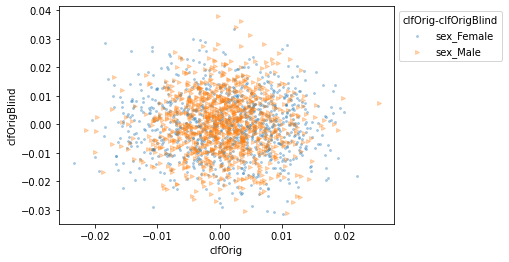

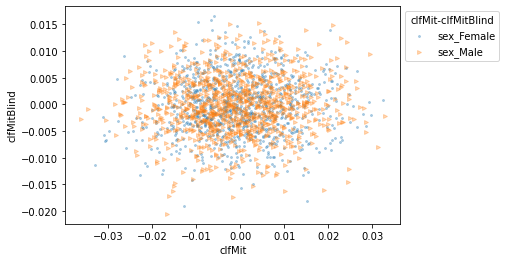

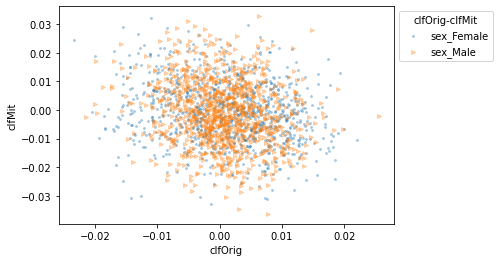

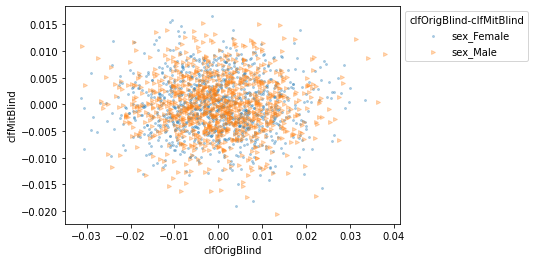

In [34]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [35]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [36]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [37]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [38]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -31.001958          -40.898969      -37.751706   
workclass                   0.649810            3.046004        3.014307   
education                 -21.912632          -25.564545      -23.885711   
marital-status            -27.164757          -40.015865      -30.597557   
occupation                 -4.621003           -6.508404       -6.610871   
relationship               61.801464           13.781058       34.582056   
race                       -0.455015            0.224524        0.041000   
capital-gain             -354.154307         -295.458832     -306.928082   
capital-loss              -53.571842          -94.902293      -81.208840   
hours-per-week             -1.376444           -1.317402       -1.808830   
native-country             -7.831974           -7.518590       -7.891488   
sex_Female                  1.985858           -0.117378        1.872072   
sex_Male                    1.186768           -0.901565        0.268235   

                clfOrigBlind-clfMitBlind  
age                           -34.149221  
workclass                       0.681507  
education                     -23.591466  
marital-status                -36.583064  
occupation                     -4.518535  
relationship                   41.000466  
race                           -0.271491  
capital-gain                 -342.685057  
capital-loss                  -67.265295  
hours-per-week                 -0.885017  
native-country                 -7.459076  
sex_Female                     -0.003592  
sex_Male                        0.016968

In [39]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.026836            0.024179        0.019677   
workclass                   0.002122            0.004141        0.003918   
education                   0.008022            0.009203        0.006642   
marital-status              0.010038            0.017534        0.016873   
occupation                  0.004515            0.005773        0.005083   
relationship                0.017464            0.030258        0.018874   
race                        0.001665            0.001841        0.001724   
capital-gain                0.055642            0.047469        0.054180   
capital-loss                0.018361            0.012005        0.025752   
hours-per-week              0.011267            0.015108        0.011695   
native-country              0.006121            0.004477        0.005105   
sex_Female                  0.010053            0.004957        0.014943   
sex_Male                    0.004887            0.010109        0.014956   

                clfOrigBlind-clfMitBlind  
age                             0.031357  
workclass                       0.002630  
education                       0.010914  
marital-status                  0.035185  
occupation                      0.004419  
relationship                    0.053124  
race                            0.001872  
capital-gain                    0.066210  
capital-loss                    0.033713  
hours-per-week                  0.016883  
native-country                  0.004098  
sex_Female                      0.000459  
sex_Male                        0.000465

In [40]:
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.586313            0.509472        1.070153   
SA-Mean               0.007470            0.007533        0.014950   
NSA-Sum              51.321928           48.112408       48.574586   
NSA-Mean              0.014732            0.015635        0.015411   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.010280  
SA-Mean                   0.000462  
NSA-Sum                  50.826381  
NSA-Mean                  0.023673

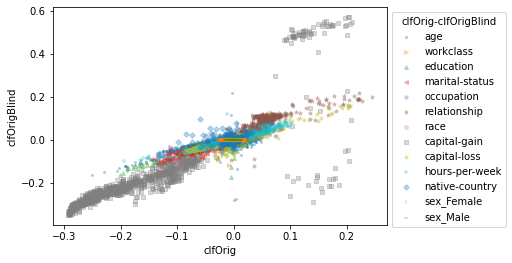

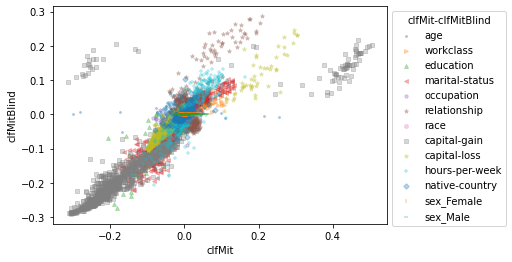

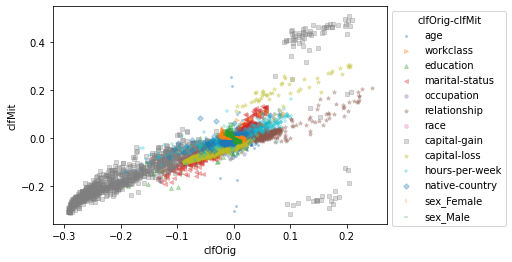

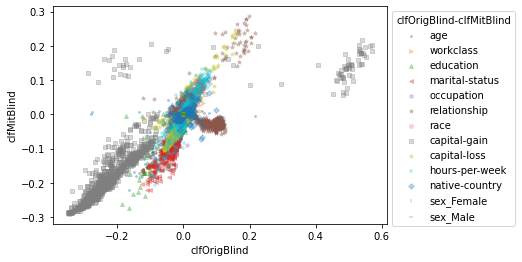

In [41]:
XAIPlots(shap_v,column_names,diffClfs=True)

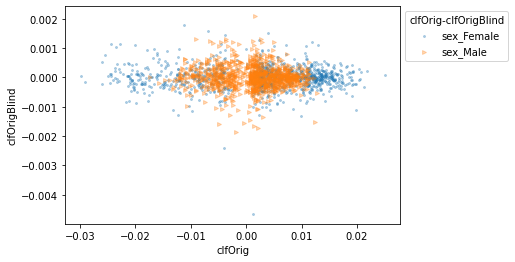

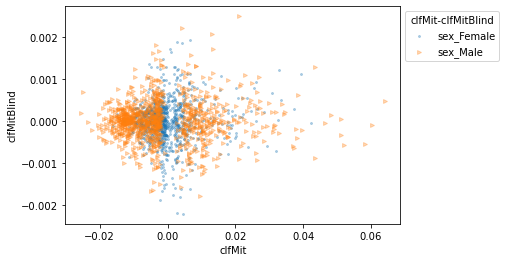

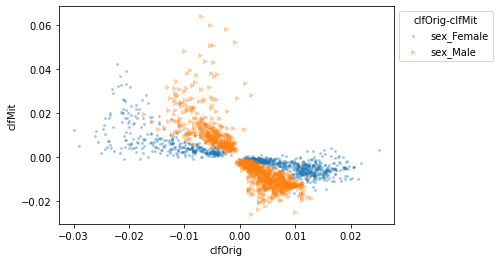

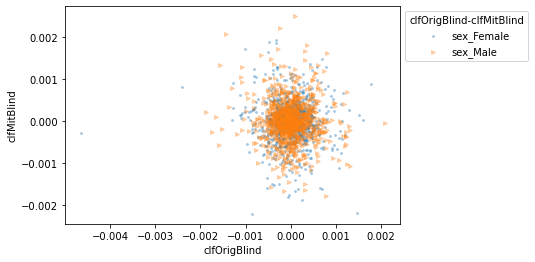

In [42]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [43]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [44]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [45]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [46]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         4.043943           -6.207074       -1.774903   
workclass                  -0.169982            0.717641        0.275107   
education                  -2.083239           -5.068586       -4.349118   
marital-status             -6.763415            1.508140       -1.889796   
occupation                 -0.942996           -1.305155       -1.259988   
relationship                9.342361            3.114164        6.711920   
race                        0.145373            0.665293        0.195322   
capital-gain             -426.160481         -321.697086     -340.907064   
capital-loss              -58.793775          -93.476338      -59.903531   
hours-per-week             -5.309964           -5.051072       -5.319308   
native-country             -6.525384          -12.268248       -6.926732   
sex_Female                  0.604515           -1.257153        0.098499   
sex_Male                    0.729732           -1.212209       -0.631136   

                clfOrigBlind-clfMitBlind  
age                            -0.388228  
workclass                       0.272553  
education                      -2.802708  
marital-status                 -3.365479  
occupation                     -0.988164  
relationship                    5.744606  
race                            0.615344  
capital-gain                 -406.950502  
capital-loss                  -92.366582  
hours-per-week                 -5.041728  
native-country                -11.866900  
sex_Female                     -0.751137  
sex_Male                        0.148659

In [47]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.019762            0.025421        0.016553   
workclass                   0.009221            0.009261        0.009649   
education                   0.010120            0.009424        0.009966   
marital-status              0.010599            0.009556        0.021139   
occupation                  0.009864            0.008719        0.009144   
relationship                0.011821            0.019851        0.009662   
race                        0.009740            0.009245        0.009593   
capital-gain                0.061819            0.076793        0.099023   
capital-loss                0.044954            0.012130        0.044924   
hours-per-week              0.016015            0.016831        0.012901   
native-country              0.015254            0.010044        0.016065   
sex_Female                  0.010886            0.009270        0.011848   
sex_Male                    0.009687            0.010401        0.011644   

                clfOrigBlind-clfMitBlind  
age                             0.029134  
workclass                       0.009532  
education                       0.010244  
marital-status                  0.027390  
occupation                      0.009763  
relationship                    0.027476  
race                            0.009436  
capital-gain                    0.085415  
capital-loss                    0.012881  
hours-per-week                  0.020880  
native-country                  0.009628  
sex_Female                      0.009705  
sex_Male                        0.009498

In [48]:
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.667123            1.234681        0.364817   
SA-Mean               0.010287            0.009835        0.011746   
NSA-Sum              47.298265           41.007164       39.046617   
NSA-Mean              0.019924            0.018843        0.023511   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.449898  
SA-Mean                   0.009602  
NSA-Sum                  48.218436  
NSA-Mean                  0.022889

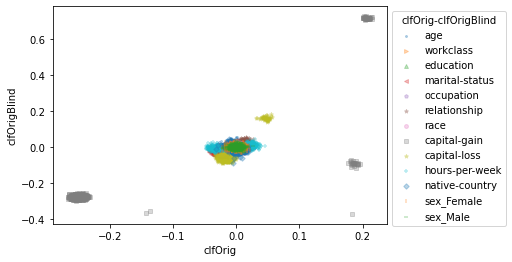

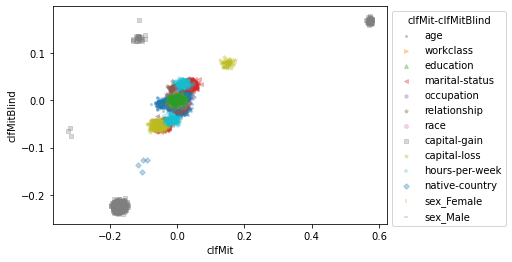

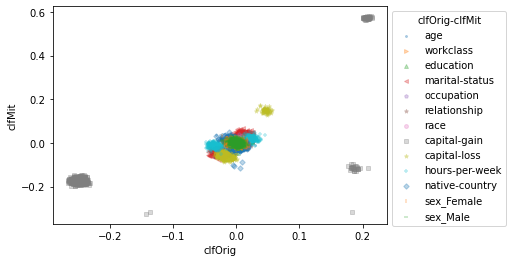

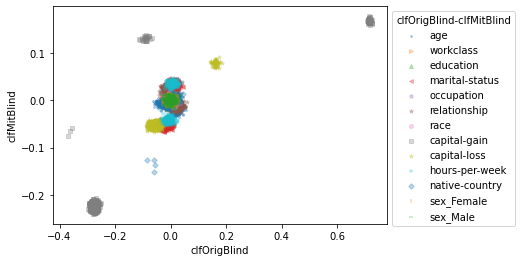

In [49]:
XAIPlots(lime_v,column_names,diffClfs=True)

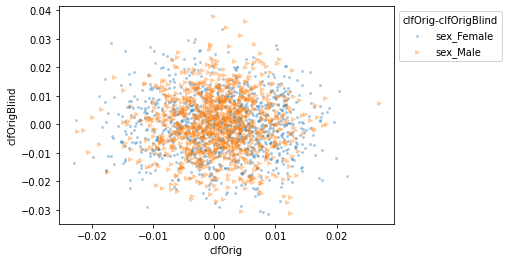

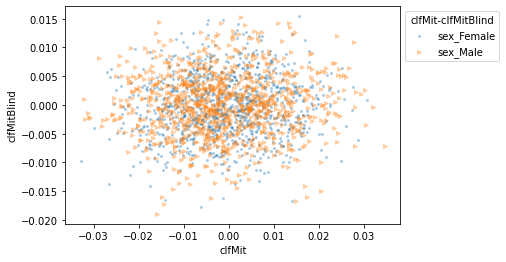

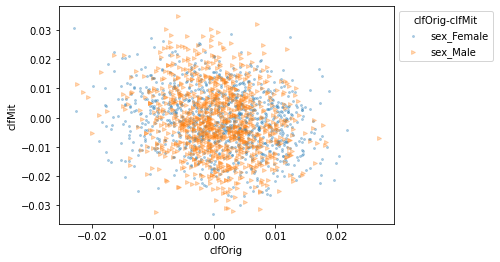

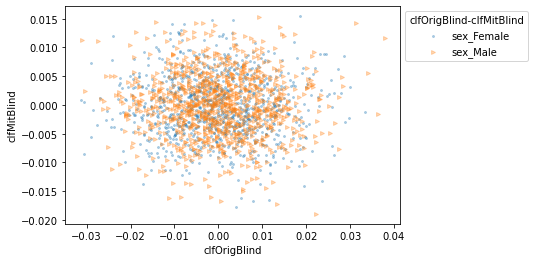

In [50]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [51]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [52]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [53]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                  -42.856138     -34.983935                 -22.914495   
workclass              1.145284       5.143138                   0.422272   
education            -22.484748     -26.040460                 -20.819286   
marital-status       -32.561295     -30.458915                 -22.304019   
occupation            -5.185041      -8.884296                  -4.312738   
relationship          51.172438      17.840031                  73.893080   
race                  -0.327836       0.208087                  -0.696351   
capital-gain        -341.559125    -263.480229                -367.166000   
capital-loss         -67.601235     -95.650872                 -44.751166   
hours-per-week        -4.593738       0.362052                   1.317298   
native-country        -8.658882      -8.124405                  -6.872298   
sex_Female             3.958031       0.095449                  -0.017298   
sex_Male               2.357430      -1.206691                   0.014992   

                clfMitBlind-clfMitBlind  
age                          -45.412159  
workclass                      1.019941  
education                    -28.672778  
marital-status               -52.016017  
occupation                    -4.978888  
relationship                  10.804339  
race                           0.083464  
capital-gain                -331.281102  
capital-loss                 -89.540659  
hours-per-week                -3.269169  
native-country                -7.458545  
sex_Female                     0.015932  
sex_Male                      -0.030023

In [54]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.002717       0.001694                   0.001281   
workclass              0.000593       0.000697                   0.000406   
education              0.000949       0.001466                   0.000663   
marital-status         0.001244       0.002129                   0.000727   
occupation             0.000654       0.001023                   0.000436   
relationship           0.000766       0.001261                   0.001374   
race                   0.000523       0.000612                   0.000443   
capital-gain           0.000922       0.008656                   0.001932   
capital-loss           0.002730       0.001565                   0.003987   
hours-per-week         0.001608       0.001519                   0.000617   
native-country         0.000746       0.001056                   0.000778   
sex_Female             0.000513       0.000690                   0.000413   
sex_Male               0.000534       0.000896                   0.000393   

                clfMitBlind-clfMitBlind  
age                            0.001317  
workclass                      0.000520  
education                      0.002769  
marital-status                 0.000935  
occupation                     0.000580  
relationship                   0.001603  
race                           0.000531  
capital-gain                   0.012347  
capital-loss                   0.004592  
hours-per-week                 0.000898  
native-country                 0.000504  
sex_Female                     0.000509  
sex_Male                       0.000486

In [55]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           3.157731       0.651070                   0.016145   
SA-Mean          0.000523       0.000793                   0.000403   
NSA-Sum         52.558705      44.652402                  51.406273   
NSA-Mean         0.001223       0.001971                   0.001150   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.022977  
SA-Mean                  0.000498  
NSA-Sum                 52.230642  
NSA-Mean                 0.002418

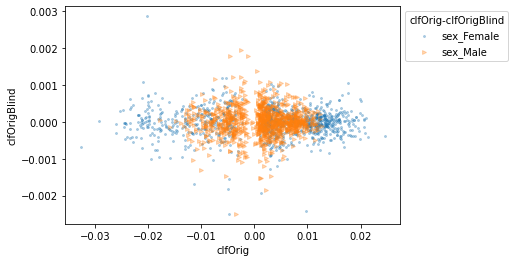

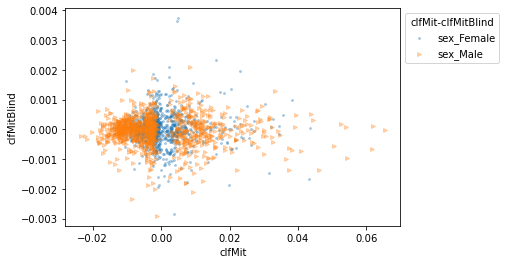

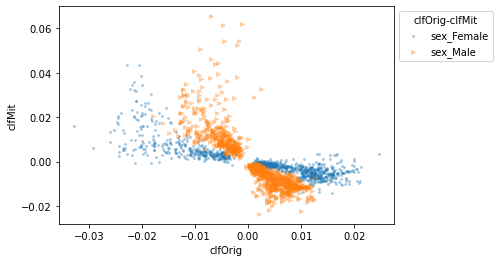

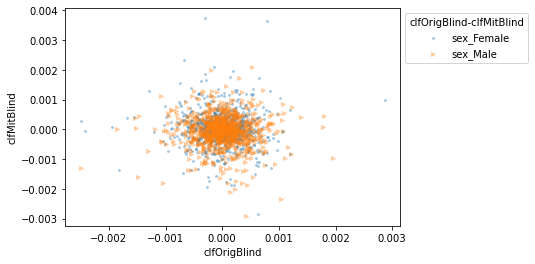

In [56]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [57]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [58]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [59]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -8.210411       3.241483                  15.510521   
workclass             -0.122087       0.809161                  -0.161543   
education             -1.722894      -6.865746                  -2.471963   
marital-status        -9.653519       5.871341                  -4.020011   
occupation            -0.591773      -1.766012                  -1.218316   
relationship           7.075526       4.380461                  11.695785   
race                   0.227625       0.178497                   0.045109   
capital-gain        -426.293748    -213.050059                -429.804599   
capital-loss         -35.163139     -95.470115                 -92.524023   
hours-per-week        -6.858351      -3.865345                  -4.001692   
native-country         2.831271     -13.791233                 -16.023456   
sex_Female             2.079297      -1.804210                  -0.876536   
sex_Male               1.171804      -2.222055                   0.302159   

                clfMitBlind-clfMitBlind  
age                          -17.248451  
workclass                      0.713734  
education                     -4.790014  
marital-status                -0.805854  
occupation                    -0.736818  
relationship                   0.326688  
race                           1.152637  
capital-gain                -388.073992  
capital-loss                 -72.003968  
hours-per-week                -6.069652  
native-country                -7.412325  
sex_Female                    -0.574265  
sex_Male                      -0.136516

In [60]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.001783       0.006113                        0.0   
workclass              0.000902       0.004639                        0.0   
education              0.000915       0.003983                        0.0   
marital-status         0.001073       0.007136                        0.0   
occupation             0.000924       0.003596                        0.0   
relationship           0.000944       0.006540                        0.0   
race                   0.000882       0.003970                        0.0   
capital-gain           0.003840       0.049530                        0.0   
capital-loss           0.010234       0.005894                        0.0   
hours-per-week         0.001253       0.004030                        0.0   
native-country         0.000911       0.008120                        0.0   
sex_Female             0.000925       0.003814                        0.0   
sex_Male               0.000871       0.003870                        0.0   

                clfMitBlind-clfMitBlind  
age                            0.002192  
workclass                      0.001399  
education                      0.004168  
marital-status                 0.002185  
occupation                     0.001085  
relationship                   0.002921  
race                           0.001109  
capital-gain                   0.004897  
capital-loss                   0.020205  
hours-per-week                 0.001329  
native-country                 0.001867  
sex_Female                     0.001237  
sex_Male                       0.001345

In [61]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           1.625551       2.013133                   0.589347   
SA-Mean          0.000898       0.003842                   0.000000   
NSA-Sum         45.340940      31.753587                  52.497911   
NSA-Mean         0.002151       0.009414                   0.000000   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.355390  
SA-Mean                  0.001291  
NSA-Sum                 45.394012  
NSA-Mean                 0.003941

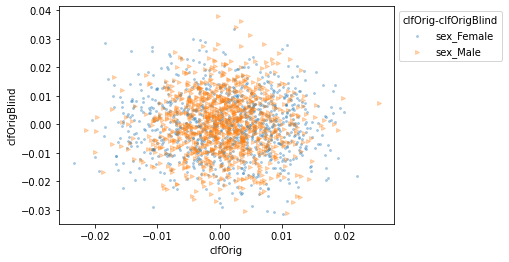

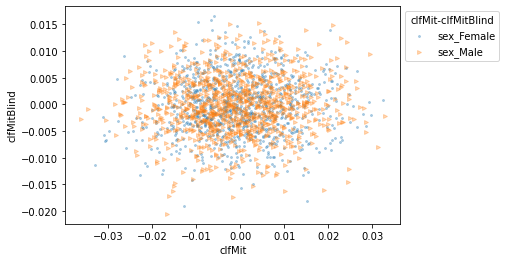

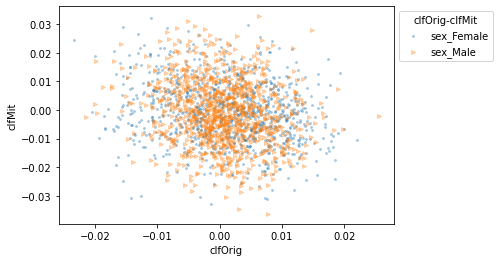

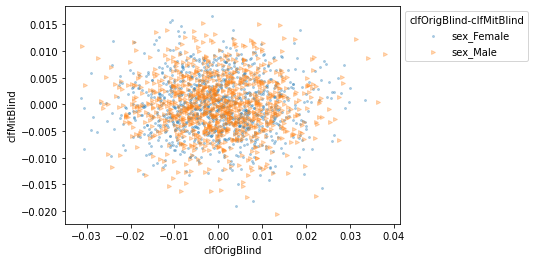

In [62]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [63]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [64]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_RF_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 1000
---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 663 ] Labeled as + class: [ 131 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 337 ] Labeled as + class: [ 18 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 663 ] Labeled as + class: [ 70 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 337 ] Labeled as + class: [ 53 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 663 ] Labeled as + class: [ 145 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 337 ] Labeled as + class: [ 19 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 663 ] Labeled as + class: [ 72 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 337 ] Labeled as + class: [ 52 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.820000            0.818000       0.820000   
Precision           0.687340            0.674942       0.690035   
Recall              0.512490            0.520735       0.500327   
F1 Score            0.581414            0.582574       0.575950   
Discrimination      0.144174            0.162323      -0.051689   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.818000        CLF Original    0.002000   
Precision                  0.678406       CLF Mitigated    0.012399   
Recall                     0.508490  CLF Original Blind    0.008245   
F1 Score                   0.577312  CLF Original Blind    0.001159   
Discrimination            -0.045705       CLF Mitigated    0.018149   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.002000   0.000000     0.000000  
Precision         0.011630   0.002695     0.003464  
Recall            0.008163   0.012163     0.012245  
F1 Score          0.001362   0.005464     0.005262  
Discrimination    0.005984   0.195864     0.208028

In [65]:

PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [66]:
PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [67]:
res = pd.read_csv(path_res+'US_RF_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.820000            0.818000       0.820000   
Precision           0.687340            0.674942       0.690035   
Recall              0.512490            0.520735       0.500327   
F1 Score            0.581414            0.582574       0.575950   
Discrimination      0.144174            0.162323      -0.051689   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.818000        CLF Original    0.002000   
Precision                  0.678406       CLF Mitigated    0.012399   
Recall                     0.508490  CLF Original Blind    0.008245   
F1 Score                   0.577312  CLF Original Blind    0.001159   
Discrimination            -0.045705       CLF Mitigated    0.018149   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.002000   0.000000     0.000000  
Precision         0.011630   0.002695     0.003464  
Recall            0.008163   0.012163     0.012245  
F1 Score          0.001362   0.005464     0.005262  
Discrimination    0.005984   0.195864     0.208028

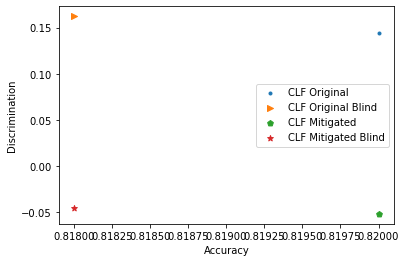

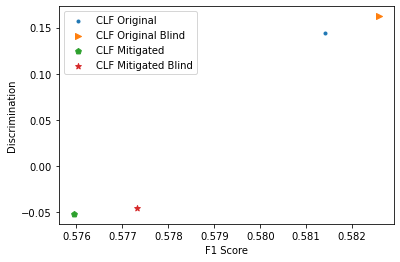

In [68]:
plotDisc(res)

In [69]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 337 instances.
    * "('sex_Male',)" grouping has 663 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 297 data points.
        - The class *>50K* has 40 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 457 data points.
        - The class *>50K* has 206 data points.


In [70]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
    *  NOT  satisfied for "('sex_Female',)" and "('sex_Male',)" sub-populations.
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographi

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': ["'sex_Female' 'sex_Male' "],
  'Delta OB-MB': ["'sex_Female' 'sex_Male' "]}}

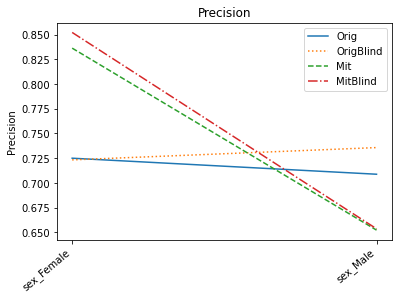

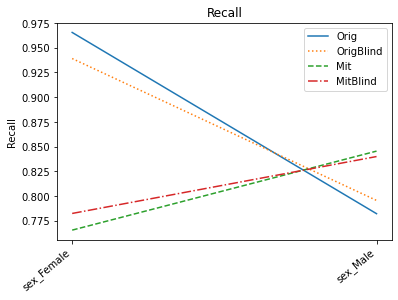

In [71]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [72]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [73]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [74]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [75]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -0.705523           -0.762916       -0.716112   
workclass                   0.039132            0.046991        0.048910   
education                  -0.419022           -0.592246       -0.480233   
marital-status             -0.044844           -0.057610       -0.043533   
occupation                  0.321035            0.347568        0.346245   
relationship                1.134947            1.455570        1.240180   
race                        0.016068            0.012279        0.016139   
capital-gain               -2.971348           -3.136968       -2.926783   
capital-loss               -0.673563           -0.673232       -0.612577   
hours-per-week             -0.461283           -0.629167       -0.535800   
native-country              0.017984            0.012586        0.017671   
sex_Female                  0.020148            0.050086        0.070932   
sex_Male                    0.016569            0.051657        0.068609   

                clfOrigBlind-clfMitBlind  
age                            -0.752327  
workclass                       0.037214  
education                      -0.531035  
marital-status                 -0.058921  
occupation                      0.322358  
relationship                    1.350337  
race                            0.012209  
capital-gain                   -3.181533  
capital-loss                   -0.734218  
hours-per-week                 -0.554651  
native-country                  0.012898  
sex_Female                     -0.000697  
sex_Male                       -0.000383

In [76]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.001942            0.003234        0.008545   
workclass                   0.001106            0.000768        0.002369   
education                   0.004081            0.001786        0.012140   
marital-status              0.001141            0.005670        0.007069   
occupation                  0.002898            0.002253        0.005946   
relationship                0.006850            0.006219        0.044247   
race                        0.000335            0.000374        0.000401   
capital-gain                0.020272            0.005203        0.015815   
capital-loss                0.006165            0.005999        0.002958   
hours-per-week              0.002290            0.002206        0.009881   
native-country              0.000368            0.000588        0.000533   
sex_Female                  0.007618            0.005719        0.007159   
sex_Male                    0.007087            0.006915        0.009762   

                clfOrigBlind-clfMitBlind  
age                             0.011243  
workclass                       0.001886  
education                       0.013138  
marital-status                  0.002688  
occupation                      0.004673  
relationship                    0.050477  
race                            0.000381  
capital-gain                    0.011106  
capital-loss                    0.003854  
hours-per-week                  0.010786  
native-country                  0.000631  
sex_Female                      0.000214  
sex_Male                        0.000172

In [77]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.018359            0.050871        0.069770   
SA-Mean               0.007352            0.006317        0.008461   
NSA-Sum               0.618613            0.702467        0.634926   
NSA-Mean              0.004313            0.003118        0.009991   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000540  
SA-Mean                   0.000193  
NSA-Sum                   0.686155  
NSA-Mean                  0.010079

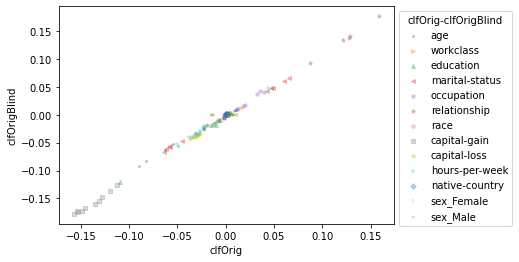

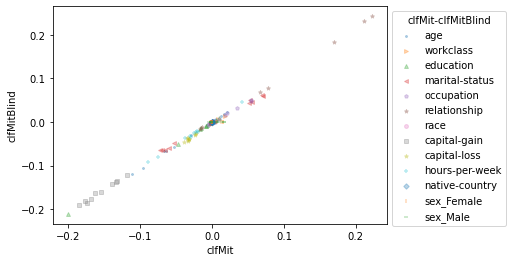

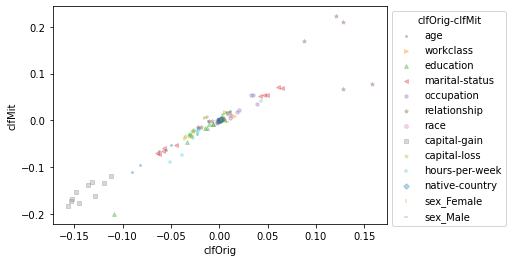

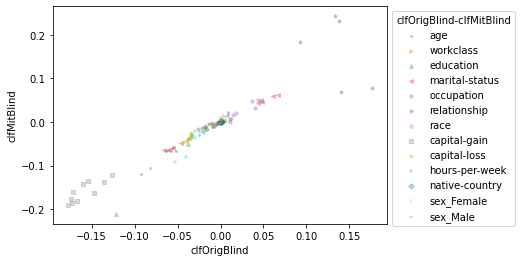

In [78]:
XAIPlots(shap_v,column_names,diffClfs=True)

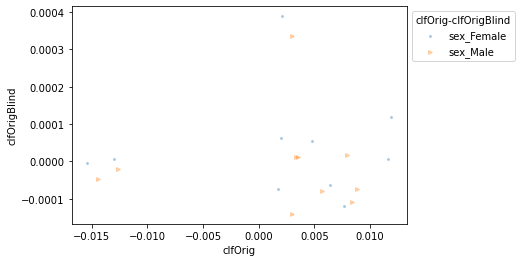

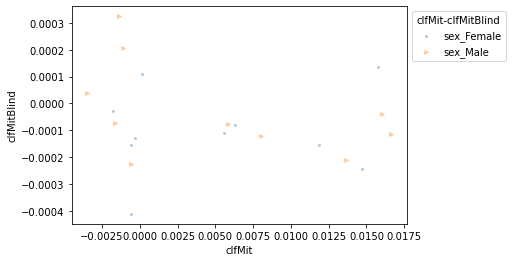

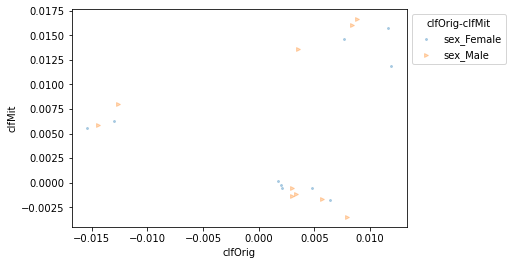

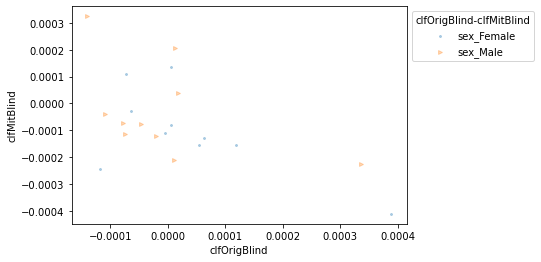

In [79]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [80]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [81]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [82]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [83]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -7.764280           -6.329870       -6.721559   
workclass                   0.613375            0.613177        0.667230   
education                   0.686194           -0.120295        0.228407   
marital-status             20.249744            9.371384       12.644945   
occupation                  0.215928           -0.088801        0.151260   
relationship              -17.541244          -14.622921      -17.000423   
race                        0.160040           -0.230609        0.006223   
capital-gain               13.833932           10.159114       11.889091   
capital-loss                1.560669            3.049171        2.239348   
hours-per-week             -0.892303           -0.491885       -0.773530   
native-country              0.087910           -0.009246        0.020097   
sex_Female                  2.171847            0.146974        2.318821   
sex_Male                    2.053572            0.351682        2.405253   

                clfOrigBlind-clfMitBlind  
age                            -7.372590  
workclass                       0.559321  
education                       0.337493  
marital-status                 16.976183  
occupation                     -0.024133  
relationship                  -15.163743  
race                           -0.076792  
capital-gain                   12.103954  
capital-loss                    2.370492  
hours-per-week                 -0.610658  
native-country                  0.058567  
sex_Female                      0.000000  
sex_Male                        0.000000

In [84]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.003054            0.002148        0.007294   
workclass                   0.000952            0.000647        0.001732   
education                   0.004866            0.001468        0.003474   
marital-status              0.003739            0.003817        0.008871   
occupation                  0.002174            0.001492        0.003358   
relationship                0.012095            0.004240        0.052721   
race                        0.000273            0.000568        0.000504   
capital-gain                0.002680            0.003811        0.005337   
capital-loss                0.001959            0.001771        0.001702   
hours-per-week              0.002650            0.002574        0.004855   
native-country              0.000295            0.000213        0.000404   
sex_Female                  0.009999            0.002151        0.011656   
sex_Male                    0.009490            0.003104        0.012368   

                clfOrigBlind-clfMitBlind  
age                             0.008491  
workclass                       0.001965  
education                       0.005186  
marital-status                  0.007829  
occupation                      0.003667  
relationship                    0.063812  
race                            0.000659  
capital-gain                    0.006242  
capital-loss                    0.001749  
hours-per-week                  0.003960  
native-country                  0.000312  
sex_Female                      0.000000  
sex_Male                        0.000000

In [85]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix_Tree.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                2.112709            0.249328        2.362037   
SA-Mean               0.009744            0.002628        0.012012   
NSA-Sum               5.782329            4.098770        4.758374   
NSA-Mean              0.003158            0.002068        0.008205   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   5.059448  
NSA-Mean                  0.009443

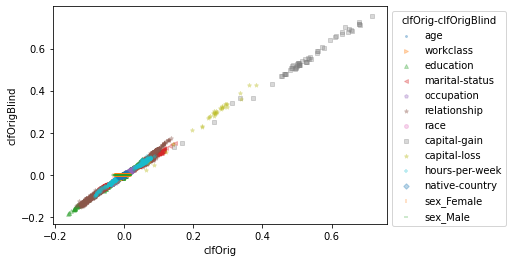

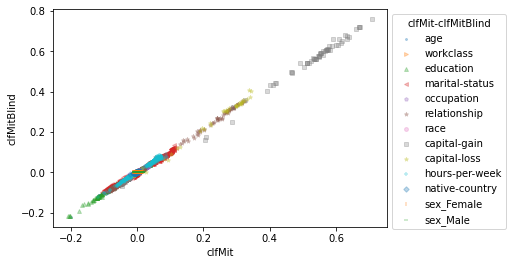

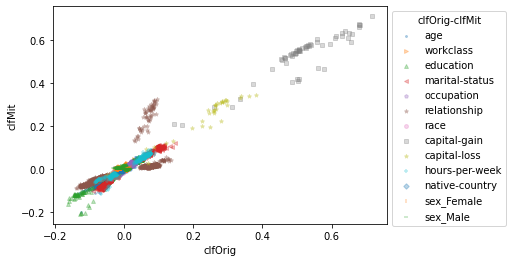

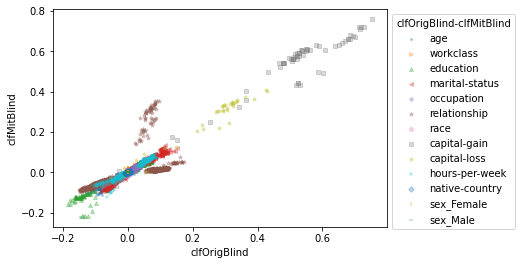

In [86]:
XAIPlots(shap_v,column_names,diffClfs=True)

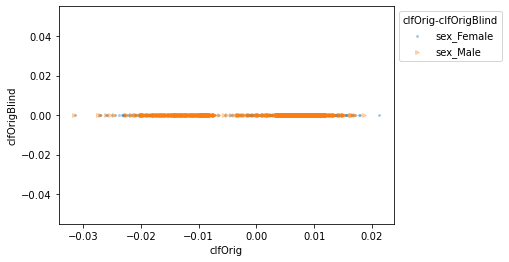

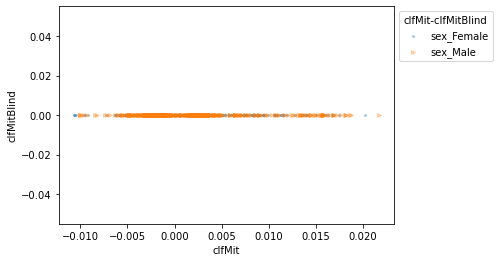

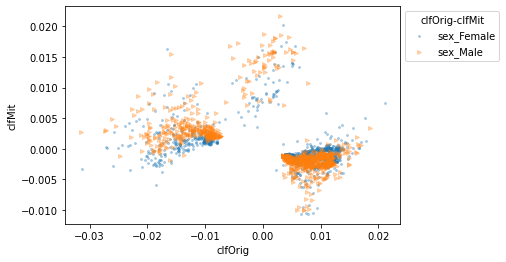

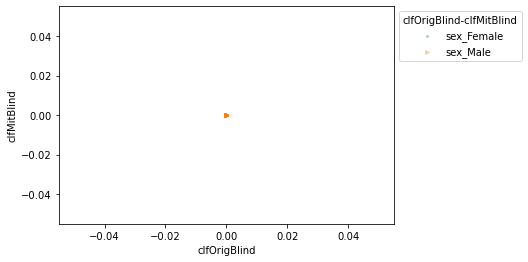

In [87]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [88]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [89]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [90]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [91]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -29.337099          -40.388950      -34.443542   
workclass                  -0.925955            0.016545       -0.369324   
education                  -8.213497          -10.502635       -9.871883   
marital-status              9.148339            7.836989        5.913152   
occupation                  9.831666           10.325273       11.449261   
relationship               25.953295           14.768414       18.344602   
race                        1.229815            0.632787        1.044675   
capital-gain             -346.833709         -354.590386     -338.715250   
capital-loss              -68.075601          -66.109944      -63.234723   
hours-per-week            -30.694223          -28.742667      -27.480296   
native-country              4.215354            2.407449        3.844577   
sex_Female                 -2.040806            0.539171       -0.914767   
sex_Male                   -0.522512            1.178901        0.496273   

                clfOrigBlind-clfMitBlind  
age                           -35.282506  
workclass                      -0.540087  
education                      -8.844249  
marital-status                 11.072175  
occupation                      8.707679  
relationship                   22.377107  
race                            0.817927  
capital-gain                 -362.708846  
capital-loss                  -70.950822  
hours-per-week                -31.956593  
native-country                  2.778226  
sex_Female                     -0.586867  
sex_Male                        0.160116

In [92]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.012714            0.011689        0.011687   
workclass                   0.009966            0.010373        0.009945   
education                   0.013315            0.010849        0.010651   
marital-status              0.011149            0.010743        0.012398   
occupation                  0.011031            0.010421        0.010216   
relationship                0.014400            0.010048        0.016457   
race                        0.010154            0.010567        0.010141   
capital-gain                0.013267            0.019546        0.008222   
capital-loss                0.010056            0.010832        0.009903   
hours-per-week              0.011460            0.011152        0.010403   
native-country              0.009300            0.009620        0.009797   
sex_Female                  0.012546            0.011087        0.014893   
sex_Male                    0.012909            0.011323        0.016774   

                clfOrigBlind-clfMitBlind  
age                             0.016755  
workclass                       0.010712  
education                       0.014672  
marital-status                  0.010592  
occupation                      0.011128  
relationship                    0.023894  
race                            0.010636  
capital-gain                    0.009296  
capital-loss                    0.009884  
hours-per-week                  0.012264  
native-country                  0.009222  
sex_Female                      0.010296  
sex_Male                        0.010322

In [93]:
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.281659            0.859036        0.705520   
SA-Mean               0.012727            0.011205        0.015834   
NSA-Sum              48.587141           48.756549       46.791935   
NSA-Mean              0.011528            0.011440        0.010893   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.373492  
SA-Mean                   0.010309  
NSA-Sum                  50.548747  
NSA-Mean                  0.012641

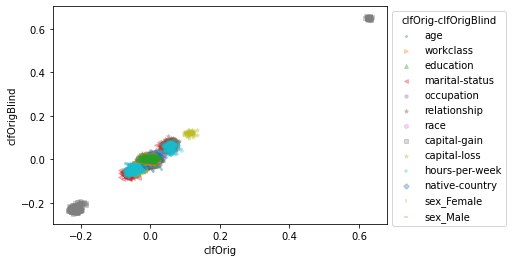

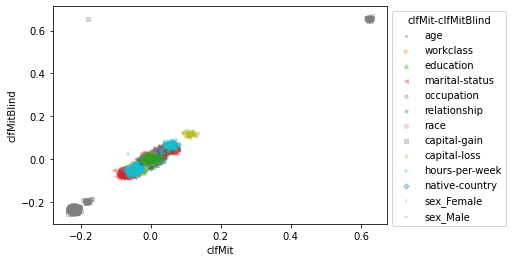

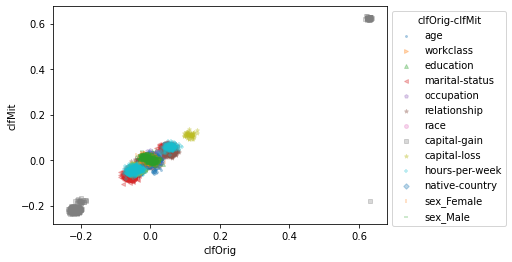

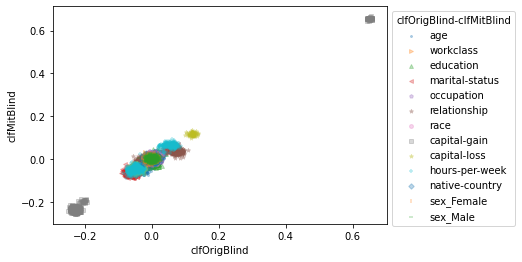

In [94]:
XAIPlots(lime_v,column_names,diffClfs=True)

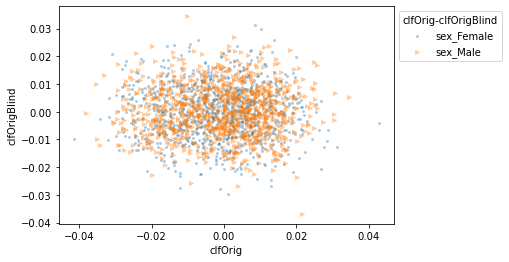

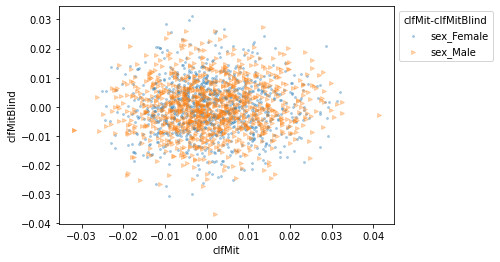

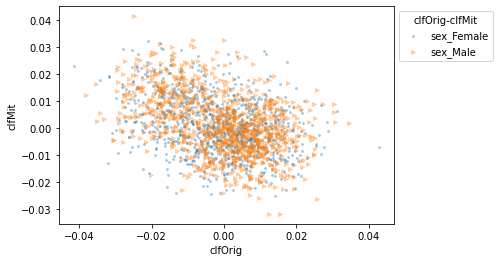

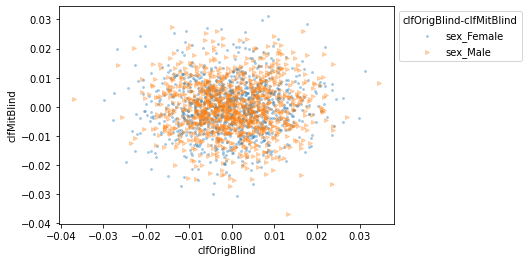

In [95]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [96]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [97]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [98]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [99]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -40.522957          -48.264922      -44.993205   
workclass                   1.690938            2.231585        2.129001   
education                 -24.217720          -27.235089      -23.022748   
marital-status            -13.613007          -11.544715      -10.830802   
occupation                 30.133617           27.818754       29.190063   
relationship              119.757619           88.631982      102.484039   
race                       -0.423753            0.178220       -0.176149   
capital-gain             -236.521375         -235.019099     -228.770117   
capital-loss              -50.705682          -48.528091      -50.169637   
hours-per-week            -14.283107          -16.046257      -15.200184   
native-country              1.159430            0.439056        0.748883   
sex_Female                  1.291395            1.471227        2.775213   
sex_Male                    1.890294            1.209101        3.092676   

                clfOrigBlind-clfMitBlind  
age                           -43.794674  
workclass                       1.793522  
education                     -28.430061  
marital-status                -14.326920  
occupation                     28.762308  
relationship                  105.905562  
race                           -0.069383  
capital-gain                 -242.770357  
capital-loss                  -49.064136  
hours-per-week                -15.129180  
native-country                  0.849602  
sex_Female                     -0.012590  
sex_Male                        0.006719

In [100]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002767            0.002619        0.007597   
workclass                   0.000607            0.000462        0.000960   
education                   0.006639            0.001929        0.005862   
marital-status              0.002623            0.004806        0.007420   
occupation                  0.002249            0.002315        0.004003   
relationship                0.008318            0.004363        0.038122   
race                        0.000475            0.000376        0.000604   
capital-gain                0.017261            0.004193        0.012015   
capital-loss                0.002318            0.002573        0.003173   
hours-per-week              0.002664            0.003124        0.004457   
native-country              0.000359            0.000390        0.000535   
sex_Female                  0.006601            0.002800        0.007953   
sex_Male                    0.007551            0.004066        0.010709   

                clfOrigBlind-clfMitBlind  
age                             0.008503  
workclass                       0.001091  
education                       0.005680  
marital-status                  0.004317  
occupation                      0.005479  
relationship                    0.045838  
race                            0.000565  
capital-gain                    0.011314  
capital-loss                    0.002636  
hours-per-week                  0.004103  
native-country                  0.000738  
sex_Female                      0.000163  
sex_Male                        0.000163

In [101]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.590845            1.340164        2.933944   
SA-Mean               0.007076            0.003433        0.009331   
NSA-Sum              48.457200           45.994343       46.155894   
NSA-Mean              0.004207            0.002468        0.007704   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.009655  
SA-Mean                   0.000163  
NSA-Sum                  48.263246  
NSA-Mean                  0.008206

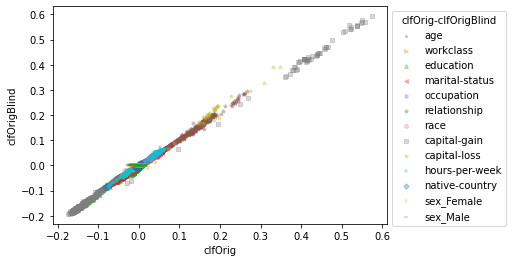

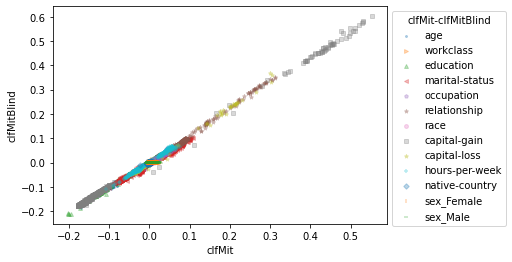

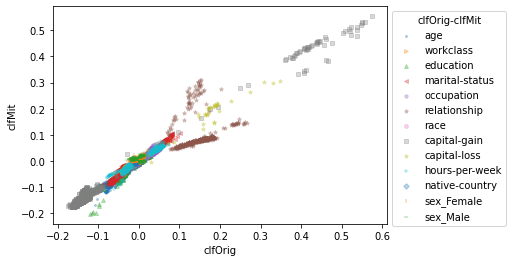

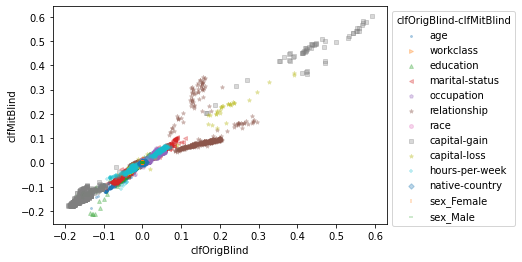

In [102]:
XAIPlots(shap_v,column_names,diffClfs=True)

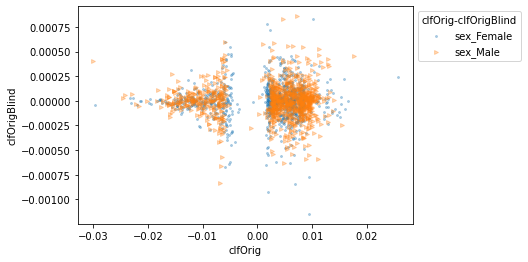

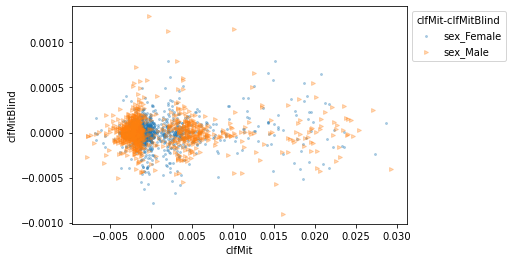

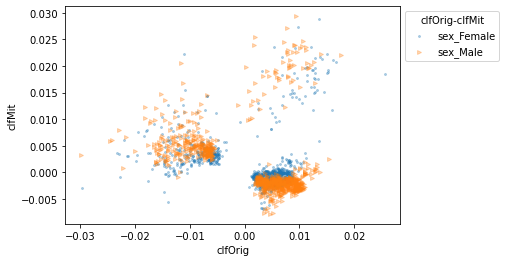

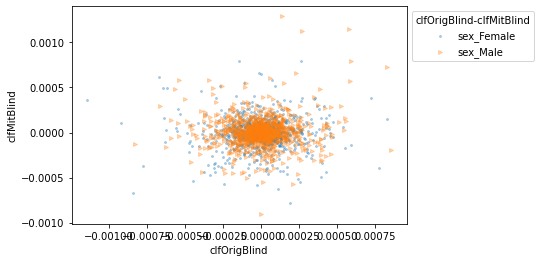

In [103]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [104]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [105]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [106]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [107]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -7.764280           -6.329870       -6.721559   
workclass                   0.613375            0.613177        0.667230   
education                   0.686194           -0.120295        0.228407   
marital-status             20.249744            9.371384       12.644945   
occupation                  0.215928           -0.088801        0.151260   
relationship              -17.541244          -14.622921      -17.000423   
race                        0.160040           -0.230609        0.006223   
capital-gain               13.833932           10.159114       11.889091   
capital-loss                1.560669            3.049171        2.239348   
hours-per-week             -0.892303           -0.491885       -0.773530   
native-country              0.087910           -0.009246        0.020097   
sex_Female                  2.171847            0.146974        2.318821   
sex_Male                    2.053572            0.351682        2.405253   

                clfOrigBlind-clfMitBlind  
age                            -7.372590  
workclass                       0.559321  
education                       0.337493  
marital-status                 16.976183  
occupation                     -0.024133  
relationship                  -15.163743  
race                           -0.076792  
capital-gain                   12.103954  
capital-loss                    2.370492  
hours-per-week                 -0.610658  
native-country                  0.058567  
sex_Female                      0.000000  
sex_Male                        0.000000

In [108]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.003054            0.002148        0.007294   
workclass                   0.000952            0.000647        0.001732   
education                   0.004866            0.001468        0.003474   
marital-status              0.003739            0.003817        0.008871   
occupation                  0.002174            0.001492        0.003358   
relationship                0.012095            0.004240        0.052721   
race                        0.000273            0.000568        0.000504   
capital-gain                0.002680            0.003811        0.005337   
capital-loss                0.001959            0.001771        0.001702   
hours-per-week              0.002650            0.002574        0.004855   
native-country              0.000295            0.000213        0.000404   
sex_Female                  0.009999            0.002151        0.011656   
sex_Male                    0.009490            0.003104        0.012368   

                clfOrigBlind-clfMitBlind  
age                             0.008491  
workclass                       0.001965  
education                       0.005186  
marital-status                  0.007829  
occupation                      0.003667  
relationship                    0.063812  
race                            0.000659  
capital-gain                    0.006242  
capital-loss                    0.001749  
hours-per-week                  0.003960  
native-country                  0.000312  
sex_Female                      0.000000  
sex_Male                        0.000000

In [109]:
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change_Tree.csv')
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                2.112709            0.249328        2.362037   
SA-Mean               0.009744            0.002628        0.012012   
NSA-Sum               5.782329            4.098770        4.758374   
NSA-Mean              0.003158            0.002068        0.008205   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   5.059448  
NSA-Mean                  0.009443

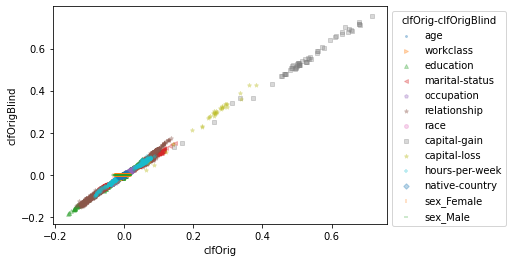

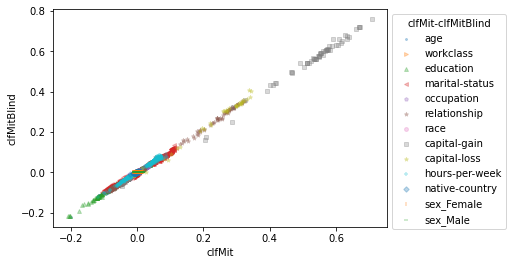

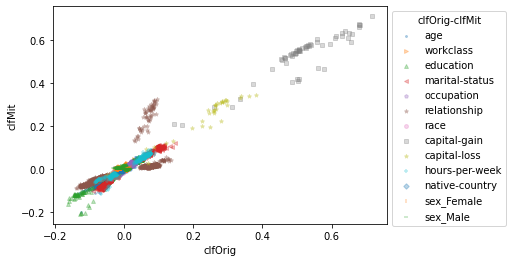

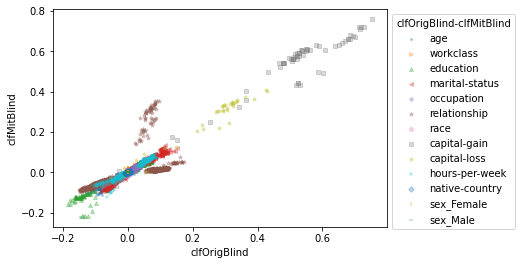

In [110]:
XAIPlots(shap_v,column_names,diffClfs=True)

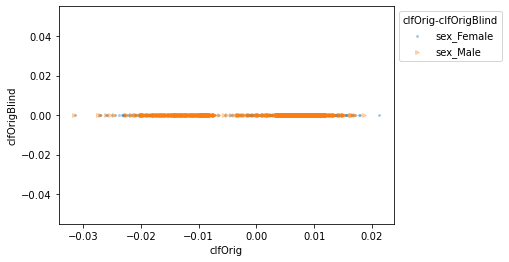

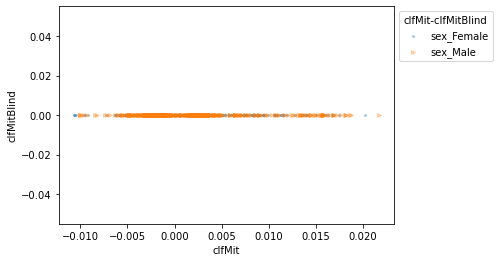

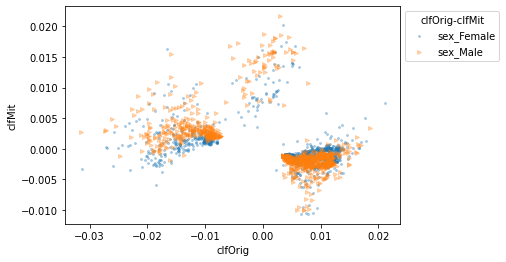

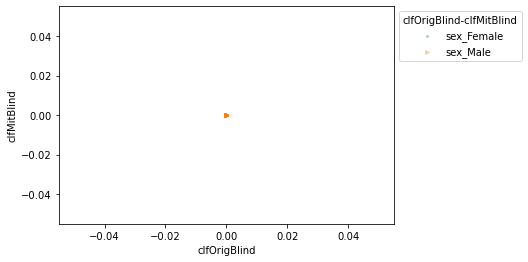

In [111]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [112]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [113]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [114]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [115]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -29.342518          -34.608058      -31.965959   
workclass                  -0.953078           -0.005989       -0.384862   
education                  -8.227384          -11.556366       -9.345445   
marital-status              9.133703            6.352688        6.916407   
occupation                  9.795146            9.885925       10.182907   
relationship               25.961067           26.847283       25.683839   
race                        1.222444            0.730401        1.128875   
capital-gain             -344.132995         -380.209476     -364.533622   
capital-loss              -65.913706         -104.865178      -64.929519   
hours-per-week            -30.650385          -29.284625      -27.331268   
native-country              4.202379            3.144369        4.327948   
sex_Female                 -1.989692            0.161197       -1.183909   
sex_Male                   -0.491084            1.171675        0.449652   

                clfOrigBlind-clfMitBlind  
age                           -31.984616  
workclass                      -0.574204  
education                     -10.438306  
marital-status                  8.569985  
occupation                      9.498165  
relationship                   27.124510  
race                            0.823970  
capital-gain                 -359.808849  
capital-loss                 -105.849364  
hours-per-week                -32.603742  
native-country                  3.018800  
sex_Female                     -0.644586  
sex_Male                        0.230939

In [116]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.012768            0.011752        0.011700   
workclass                   0.010000            0.010449        0.010009   
education                   0.013325            0.011582        0.011475   
marital-status              0.011160            0.011372        0.012538   
occupation                  0.011031            0.010714        0.010445   
relationship                0.014417            0.010796        0.026348   
race                        0.010164            0.010394        0.010081   
capital-gain                0.015628            0.019434        0.035114   
capital-loss                0.010841            0.037739        0.009706   
hours-per-week              0.011509            0.011081        0.010353   
native-country              0.009281            0.008919        0.009603   
sex_Female                  0.012562            0.010696        0.014723   
sex_Male                    0.012914            0.011314        0.016768   

                clfOrigBlind-clfMitBlind  
age                             0.015909  
workclass                       0.010666  
education                       0.012613  
marital-status                  0.011087  
occupation                      0.011243  
relationship                    0.038709  
race                            0.010675  
capital-gain                    0.008051  
capital-loss                    0.035703  
hours-per-week                  0.011912  
native-country                  0.009148  
sex_Female                      0.010244  
sex_Male                        0.010365

In [117]:
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.240388            0.666436        0.816780   
SA-Mean               0.012738            0.011005        0.015745   
NSA-Sum              48.139528           55.226396       49.702786   
NSA-Mean              0.011829            0.014021        0.014307   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.437763  
SA-Mean                   0.010304  
NSA-Sum                  53.663138  
NSA-Mean                  0.015974

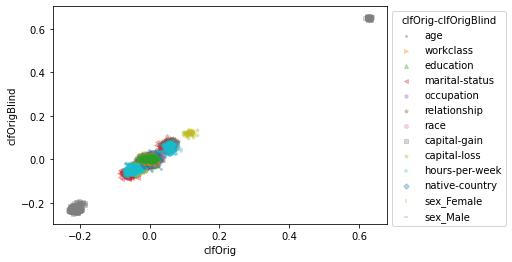

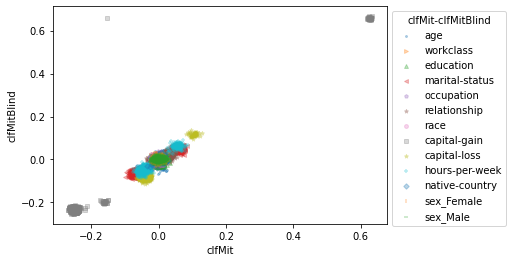

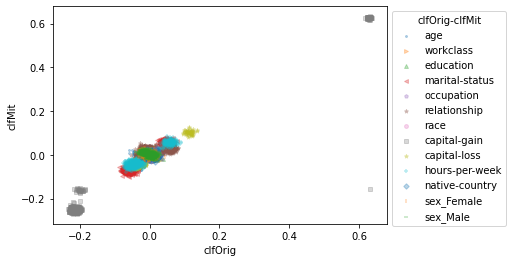

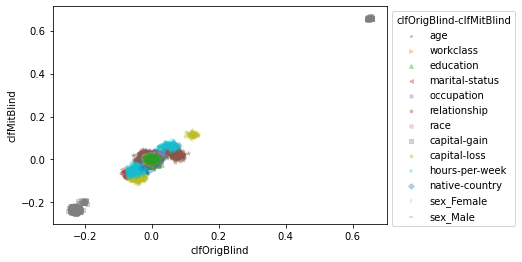

In [118]:
XAIPlots(lime_v,column_names,diffClfs=True)

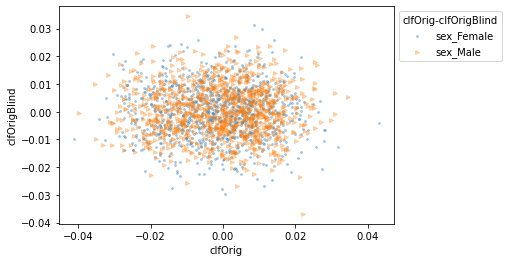

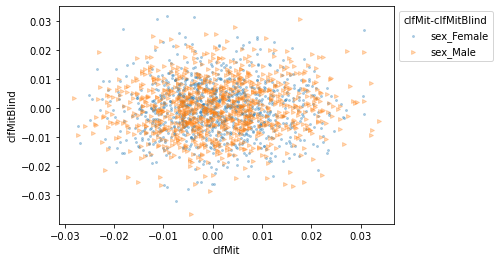

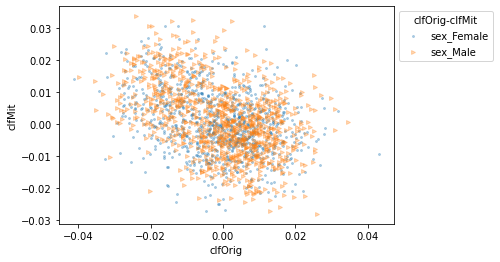

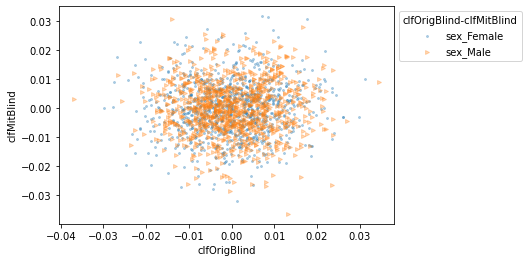

In [119]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [120]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [121]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [122]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -0.704767      -0.750754                  -0.703767   
workclass              0.047692       0.052889                   0.030629   
education             -0.353086      -0.591170                  -0.465349   
marital-status        -0.076093      -0.060389                  -0.074851   
occupation             0.310479       0.358073                   0.321650   
relationship           1.094690       1.422467                   1.144447   
race                   0.017851       0.015313                   0.011205   
capital-gain          -2.834794      -3.017863                  -3.214243   
capital-loss          -0.660196      -0.608167                  -0.710597   
hours-per-week        -0.462407      -0.618505                  -0.470475   
native-country         0.017892       0.015701                   0.016694   
sex_Female             0.042688       0.101134                  -0.000707   
sex_Male               0.034491       0.106194                  -0.000202   

                clfMitBlind-clfMitBlind  
age                           -0.765546  
workclass                      0.044937  
education                     -0.604186  
marital-status                -0.099883  
occupation                     0.324128  
relationship                   1.552964  
race                           0.012578  
capital-gain                  -3.065965  
capital-loss                  -0.689695  
hours-per-week                -0.645661  
native-country                 0.009834  
sex_Female                    -0.000734  
sex_Male                      -0.000440

In [123]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.001248       0.001160                   0.001502   
workclass              0.000248       0.000276                   0.000197   
education              0.002678       0.001145                   0.000701   
marital-status         0.002959       0.002319                   0.003166   
occupation             0.001346       0.001048                   0.000519   
relationship           0.001241       0.002439                   0.004317   
race                   0.000174       0.000213                   0.000293   
capital-gain           0.006617       0.006707                   0.004018   
capital-loss           0.004829       0.001110                   0.002462   
hours-per-week         0.001013       0.000299                   0.000325   
native-country         0.000197       0.000188                   0.000175   
sex_Female             0.000352       0.000265                   0.000174   
sex_Male               0.000185       0.000497                   0.000120   

                clfMitBlind-clfMitBlind  
age                            0.002035  
workclass                      0.000355  
education                      0.000306  
marital-status                 0.002523  
occupation                     0.000459  
relationship                   0.003990  
race                           0.000241  
capital-gain                   0.012304  
capital-loss                   0.004352  
hours-per-week                 0.000665  
native-country                 0.000455  
sex_Female                     0.000163  
sex_Male                       0.000182

In [124]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.038589       0.103664                   0.000455   
SA-Mean          0.000268       0.000381                   0.000147   
NSA-Sum          0.598177       0.682845                   0.651264   
NSA-Mean         0.002050       0.001537                   0.001607   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000587  
SA-Mean                  0.000173  
NSA-Sum                  0.710489  
NSA-Mean                 0.002517

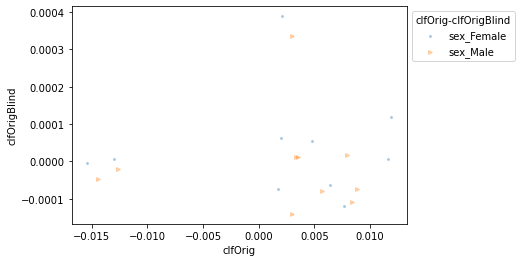

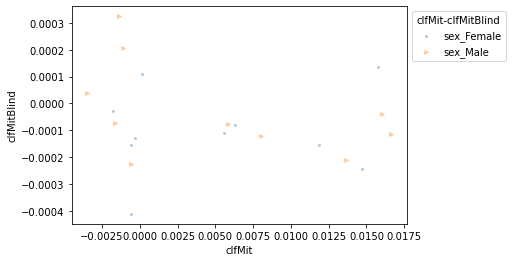

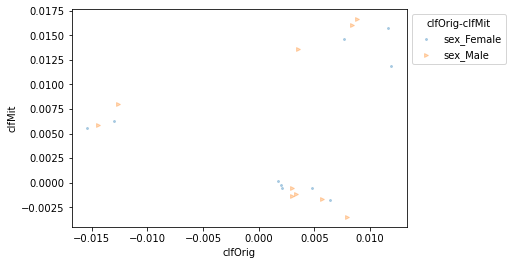

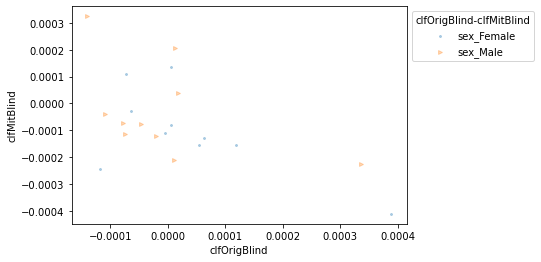

In [125]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [126]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [127]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [128]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -6.989961      -6.453157                  -8.538598   
workclass              0.645275       0.689185                   0.581474   
education              0.486384      -0.029570                   0.886004   
marital-status        17.586484       7.703406                  22.913004   
occupation             0.371036      -0.068516                   0.060820   
relationship         -20.093536     -13.907311                 -14.988953   
race                   0.168034      -0.155588                   0.152047   
capital-gain          13.622041      10.156142                  14.045823   
capital-loss           1.568596       2.910101                   1.552741   
hours-per-week        -0.921809      -0.625250                  -0.862797   
native-country         0.051239      -0.011046                   0.124580   
sex_Female             4.343694       0.293947                   0.000000   
sex_Male               4.107143       0.703363                   0.000000   

                clfMitBlind-clfMitBlind  
age                           -6.206582  
workclass                      0.537168  
education                     -0.211019  
marital-status                11.039362  
occupation                    -0.109087  
relationship                 -15.338532  
race                          -0.305630  
capital-gain                  10.162086  
capital-loss                   3.188242  
hours-per-week                -0.358520  
native-country                -0.007446  
sex_Female                     0.000000  
sex_Male                       0.000000

In [129]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                         0.0            0.0                        0.0   
workclass                   0.0            0.0                        0.0   
education                   0.0            0.0                        0.0   
marital-status              0.0            0.0                        0.0   
occupation                  0.0            0.0                        0.0   
relationship                0.0            0.0                        0.0   
race                        0.0            0.0                        0.0   
capital-gain                0.0            0.0                        0.0   
capital-loss                0.0            0.0                        0.0   
hours-per-week              0.0            0.0                        0.0   
native-country              0.0            0.0                        0.0   
sex_Female                  0.0            0.0                        0.0   
sex_Male                    0.0            0.0                        0.0   

                clfMitBlind-clfMitBlind  
age                                 0.0  
workclass                           0.0  
education                           0.0  
marital-status                      0.0  
occupation                          0.0  
relationship                        0.0  
race                                0.0  
capital-gain                        0.0  
capital-loss                        0.0  
hours-per-week                      0.0  
native-country                      0.0  
sex_Female                          0.0  
sex_Male                            0.0

In [130]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           4.225419       0.498655                    0.00000   
SA-Mean          0.000000       0.000000                    0.00000   
NSA-Sum          5.682218       3.882661                    5.88244   
NSA-Mean         0.000000       0.000000                    0.00000   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000000  
SA-Mean                  0.000000  
NSA-Sum                  4.314879  
NSA-Mean                 0.000000

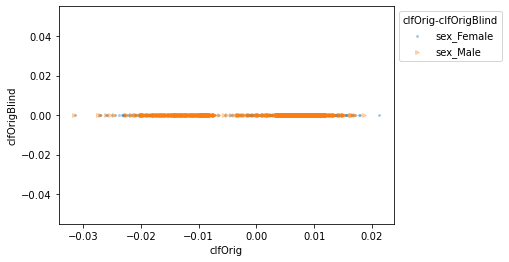

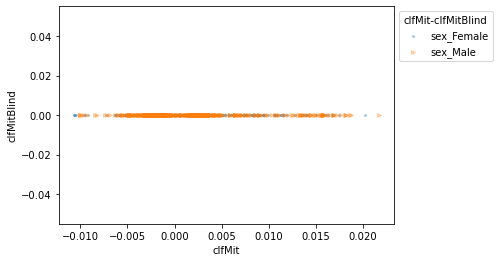

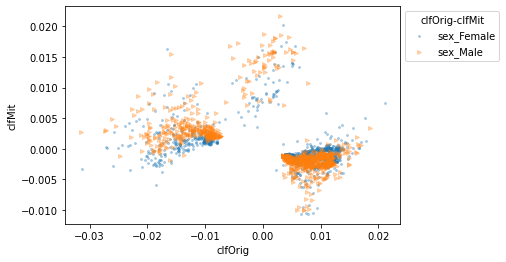

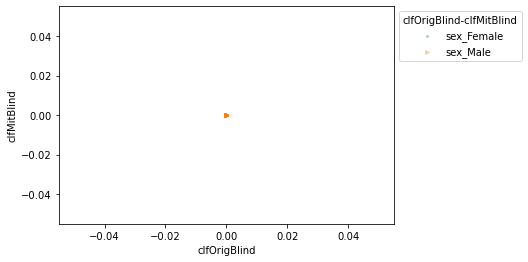

In [131]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [132]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [133]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [134]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                  -31.695797     -34.713705                 -26.983820   
workclass             -0.991603       0.237416                  -0.887431   
education            -11.422271      -7.795057                  -5.018610   
marital-status         5.272523       7.557036                  13.009519   
occupation            11.892114       9.740053                   7.734699   
relationship          22.488944      21.539496                  29.425417   
race                   1.249342       0.924209                   1.202918   
capital-gain        -334.184330    -369.064542                -356.782374   
capital-loss         -63.555324     -64.608918                 -70.433983   
hours-per-week       -27.937306     -26.874257                 -33.407302   
native-country         4.553007       3.619518                   3.864727   
sex_Female            -3.536972       1.438296                  -0.493526   
sex_Male              -1.600137       2.546062                   0.586541   

                clfMitBlind-clfMitBlind  
age                          -40.283303  
workclass                     -0.226860  
education                    -14.263945  
marital-status                 6.632641  
occupation                    10.471145  
relationship                  20.076200  
race                           0.438979  
capital-gain                -365.735320  
capital-loss                -106.366204  
hours-per-week               -31.153034  
native-country                 1.932300  
sex_Female                    -0.737927  
sex_Male                      -0.195486

In [135]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.000578       0.005465                        0.0   
workclass              0.000562       0.003066                        0.0   
education              0.000574       0.004951                        0.0   
marital-status         0.000544       0.003759                        0.0   
occupation             0.000556       0.002799                        0.0   
relationship           0.000574       0.012334                        0.0   
race                   0.000533       0.002678                        0.0   
capital-gain           0.002734       0.029911                        0.0   
capital-loss           0.003427       0.005518                        0.0   
hours-per-week         0.000567       0.002304                        0.0   
native-country         0.000566       0.005919                        0.0   
sex_Female             0.000559       0.002455                        0.0   
sex_Male               0.000547       0.002338                        0.0   

                clfMitBlind-clfMitBlind  
age                            0.004705  
workclass                      0.002115  
education                      0.010559  
marital-status                 0.002847  
occupation                     0.001669  
relationship                   0.016399  
race                           0.001456  
capital-gain                   0.003089  
capital-loss                   0.034925  
hours-per-week                 0.001800  
native-country                 0.002194  
sex_Female                     0.001764  
sex_Male                       0.002116

In [136]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           2.568555       1.992179                   0.540033   
SA-Mean          0.000553       0.002397                   0.000000   
NSA-Sum         46.840233      49.697655                  49.886436   
NSA-Mean         0.001020       0.007155                   0.000000   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.466707  
SA-Mean                  0.001940  
NSA-Sum                 54.325448  
NSA-Mean                 0.007432

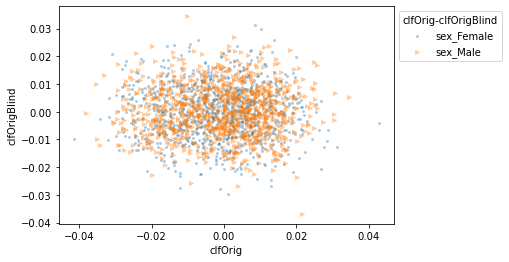

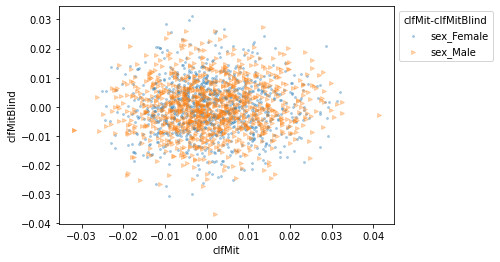

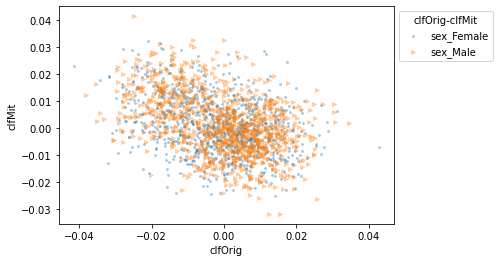

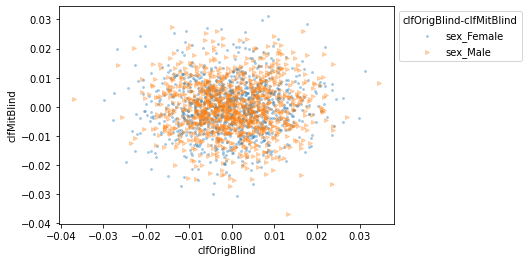

In [137]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

## Preferential Sampling

In [2]:
path_res = '/Users/Marta/FAccT/Res-ADULT/'
path_data = 'datasets/'
filename = 'adult.csv'
sensitive = ['sex'] #OR 'race','marital-status'
df = prepare_adult_dataset(filename, path_data, sensitive)
df

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


target  age  workclass  education  marital-status  occupation  \
0           0   39          6          9               4           0   
1           0   50          5          9               2           3   
2           0   38          3         11               0           5   
3           0   53          3          1               2           5   
4           0   28          3          9               2           9   
...       ...  ...        ...        ...             ...         ...   
32556       0   27          3          7               2          12   
32557       1   40          3         11               2           6   
32558       0   58          3         11               6           0   
32559       0   22          3         11               4           0   
32560       1   52          4         11               2           3   

       relationship  race  capital-gain  capital-loss  hours-per-week  \
0                 1     4          2174             0              40   
1                 0     4             0             0              13   
2                 1     4             0             0              40   
3                 0     2             0             0              40   
4                 5     2             0             0              40   
...             ...   ...           ...           ...             ...   
32556             5     4             0             0              38   
32557             0     4             0             0              40   
32558             4     4             0             0              40   
32559             3     4             0             0              20   
32560             5     4         15024             0              40   

       native-country  sex_Female  sex_Male  
0                  38           0         1  
1                  38           0         1  
2                  38           0         1  
3                  38           0         1  
4                   4           1         0  
...               ...         ...       ...  
32556              38           1         0  
32557              38           0         1  
32558              38           1         0  
32559              38           0         1  
32560              38           1         0  

[32561 rows x 14 columns]

In [3]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['<=50K','>50K']
# dictionary={'<=50K': 0, '>50K': 1}
adClass=1
disClass=0
protected = ['sex_Female','sex_Male']#['race_Amer-Indian-Eskimo','race_Asian-Pac-Islander','race_Black','race_Other','race_White']
protected_feature='sexes'#'races' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr='sex_Male'
disAttr='sex_Female'

In [4]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [5]:
X = X.sample(5000)
X_blind = X_blind.iloc[X.index]
Y = Y[X.index]

X_test = pd.DataFrame(X_test, columns=column_names)
X_test = X_test.sample(1000)
y_test = y_test[X_test.index]
X_test = X_test.values

In [6]:

ranker = rankers(X,X_blind,Y)

Non-Blind Rankers
GaussianNB(var_smoothing=0.03511191734215131)
LogisticRegression(C=11.288378916846883, solver='liblinear')
RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       n_estimators=500)


The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=1, gamma=0.1, probability=True)
Non-Blind Rankers Evaluation
           Gaussian Naive Bayes  Calibrated Gaussian Naive Bayes  \
Accuracy               0.813200                         0.811800   
Precision              0.902840                         0.874704   
Recall                 0.208396                         0.210139   
F1 Score               0.338215                         0.338364   

           Logistic Regression  Calibrated Logistic Regression  Random Forest  \
Accuracy              0.812200                        0.813800       0.851600   
Precision             0.708606                        0.757491       0.822023   
Recall                0.308616                        0.280699       0.455098   
F1 Score              0.429782                        0.407827       0.583515   

           Calibrated Random Forest  Support Vector Classifier  \
Accuracy                   0.860200                   0.776600   
Precision                  0.744213                   

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=1, gamma=0.1, probability=True)
Blind Rankers Evaluation
           Blind Gaussian Naive Bayes  Blind Calibrated Gaussian Naive Bayes  \
Accuracy                     0.813200                               0.811800   
Precision                    0.902840                               0.874704   
Recall                       0.208396                               0.210139   
F1 Score                     0.338215                               0.338364   

           Blind Logistic Regression  Blind Calibrated Logistic Regression  \
Accuracy                    0.810600                              0.812800   
Precision                   0.705965                              0.753542   
Recall                      0.300771                              0.273754   
F1 Score                    0.421423                              0.401191   

           Blind Random Forest  Blind Calibrated Random Forest  \
Accuracy              0.851600                        0.859800   
Precision    

In [7]:

PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(ranker, f)

In [8]:
PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "rb") as f:
  ranker = pickle.load(f)

In [9]:
findFreq(target,protected,df)

({'sex_Female': 6721, 'sex_Male': 10592},
 {'sex_Female': 799, 'sex_Male': 4680})

In [10]:
df_new=PreferentialSampling(target,protected,ranker,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'sex_Female': 6721, 'sex_Male': 10592}
Counting labels = 1  {'sex_Female': 799, 'sex_Male': 4680}
DN  ('sex_Female', 6721)
FP  ('sex_Male', 4680)
DP  ('sex_Female', 799)
FN  ('sex_Male', 10592)
Len DN_df  6721
Len FP_df  4680
Len DP_df  799
Len FN_df  10592


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Len restData 0
DN_expected  5712
1009 to be removed
Len DN_df after sampling  5712
FP_expected  3671
1009 to be removed
Len FP_df after sampling  3671
DP_expected  1808
1009 to add
Len DP_df after sampling  1808
FN_expected  11601
1009 to add
Len FN_df after sampling  11601


In [11]:
findFreq(target,protected,df_new)

({'sex_Female': 5712, 'sex_Male': 11601},
 {'sex_Female': 1808, 'sex_Male': 3671})

In [12]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,True)

### MLP

In [13]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [14]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_MLP_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 1000


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer

---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 654 ] Labeled as + class: [ 112 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 346 ] Labeled as + class: [ 15 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 654 ] Labeled as + class: [ 118 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 346 ] Labeled as + class: [ 95 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 654 ] Labeled as + class: [ 202 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 346 ] Labeled as + class: [ 40 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 654 ] Labeled as + class: [ 104 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 346 ] Labeled as + class: [ 75 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.795000            0.797000       0.793000   
Precision           0.563440            0.581450       0.567792   
Recall              0.491674            0.491397       0.500463   
F1 Score            0.519460            0.531666       0.529118   
Discrimination      0.127901            0.193262      -0.094138   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.789000   CLF Original Blind    0.002000   
Precision                  0.587577  CLF Mitigated Blind    0.018010   
Recall                     0.411101        CLF Mitigated    0.000278   
F1 Score                   0.461636   CLF Original Blind    0.012205   
Discrimination            -0.057742        CLF Mitigated    0.065360   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.004000   0.002000     0.008000  
Precision         0.019786   0.004352     0.006127  
Recall            0.089362   0.008788     0.080296  
F1 Score          0.067481   0.009657     0.070029  
Discrimination    0.036397   0.222040     0.251003

In [15]:

PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [16]:
PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [17]:
res = pd.read_csv(path_res+'PS_MLP_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.795000            0.797000       0.793000   
Precision           0.563440            0.581450       0.567792   
Recall              0.491674            0.491397       0.500463   
F1 Score            0.519460            0.531666       0.529118   
Discrimination      0.127901            0.193262      -0.094138   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.789000   CLF Original Blind    0.002000   
Precision                  0.587577  CLF Mitigated Blind    0.018010   
Recall                     0.411101        CLF Mitigated    0.000278   
F1 Score                   0.461636   CLF Original Blind    0.012205   
Discrimination            -0.057742        CLF Mitigated    0.065360   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.004000   0.002000     0.008000  
Precision         0.019786   0.004352     0.006127  
Recall            0.089362   0.008788     0.080296  
F1 Score          0.067481   0.009657     0.070029  
Discrimination    0.036397   0.222040     0.251003

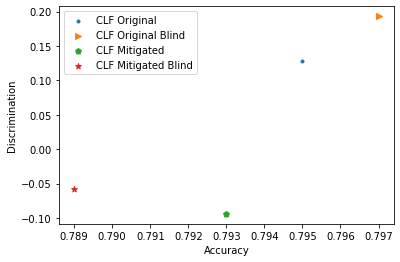

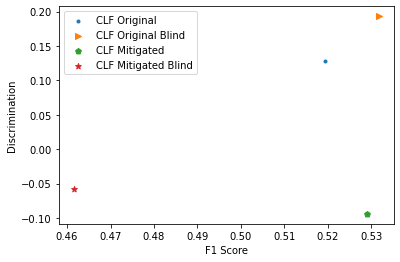

In [18]:
plotDisc(res)

In [19]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 346 instances.
    * "('sex_Male',)" grouping has 654 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 299 data points.
        - The class *>50K* has 47 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 467 data points.
        - The class *>50K* has 187 data points.


In [20]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:


{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

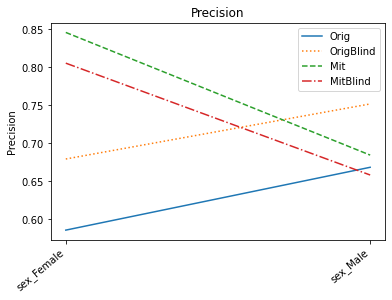

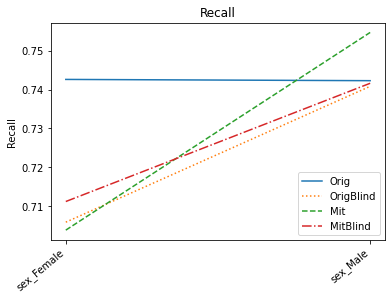

In [21]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [22]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [23]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [24]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [25]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -24.874877          -38.586774      -32.934656   
workclass                   0.943046            4.861040        3.040829   
education                 -22.249053          -23.757653      -22.110340   
marital-status            -30.399723          -51.839784      -62.146804   
occupation                 -3.131800           -5.414300       -3.276614   
relationship               41.532021           31.749499       19.204015   
race                        0.035004           -1.320237       -0.784840   
capital-gain             -331.542033         -362.440010     -276.000231   
capital-loss              -85.207840         -111.752025      -80.308305   
hours-per-week             -3.957077           -2.322333       -3.305223   
native-country             -8.452134           -8.032550       -8.624477   
sex_Female                  1.424728            0.342818        1.725995   
sex_Male                    0.394439            4.133428        4.576493   

                clfOrigBlind-clfMitBlind  
age                           -30.526995  
workclass                       2.763257  
education                     -23.896367  
marital-status                -20.092703  
occupation                     -5.269487  
relationship                   54.077505  
race                           -0.500394  
capital-gain                 -417.981812  
capital-loss                 -116.651560  
hours-per-week                 -2.974187  
native-country                 -7.860208  
sex_Female                      0.041551  
sex_Male                       -0.048626

In [26]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.011214            0.022089        0.020147   
workclass                   0.002057            0.005130        0.004288   
education                   0.005803            0.010255        0.011205   
marital-status              0.024411            0.049881        0.028361   
occupation                  0.005039            0.010735        0.008935   
relationship                0.037289            0.016343        0.022626   
race                        0.001498            0.002877        0.002770   
capital-gain                0.046334            0.142458        0.039767   
capital-loss                0.012916            0.028988        0.022899   
hours-per-week              0.007112            0.019788        0.020095   
native-country              0.004330            0.006059        0.005788   
sex_Female                  0.008619            0.018811        0.027428   
sex_Male                    0.001918            0.043583        0.045242   

                clfOrigBlind-clfMitBlind  
age                             0.017238  
workclass                       0.005030  
education                       0.011377  
marital-status                  0.018458  
occupation                      0.008642  
relationship                    0.051552  
race                            0.002739  
capital-gain                    0.076803  
capital-loss                    0.028888  
hours-per-week                  0.012747  
native-country                  0.005144  
sex_Female                      0.000640  
sex_Male                        0.000636

In [27]:
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.909583            2.238123        3.151244   
SA-Mean               0.005268            0.031197        0.036335   
NSA-Sum              50.211328           58.370564       46.521485   
NSA-Mean              0.014364            0.028600        0.016989   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.045089  
SA-Mean                   0.000638  
NSA-Sum                  62.054043  
NSA-Mean                  0.021693

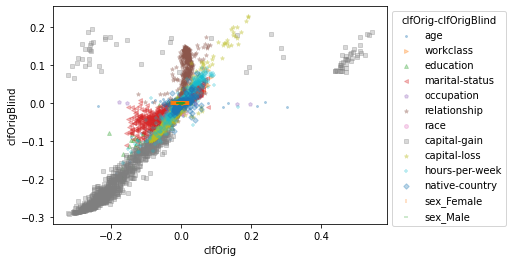

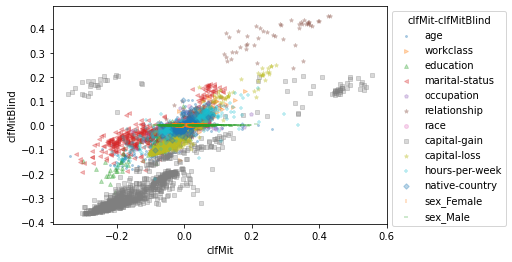

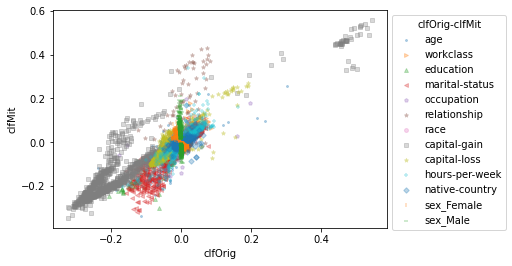

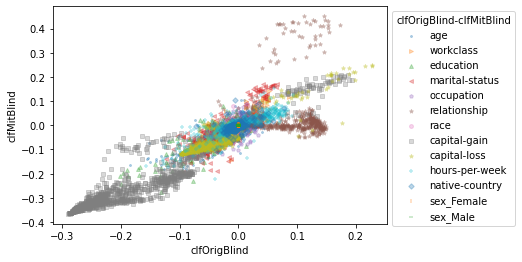

In [28]:
XAIPlots(shap_v,column_names,diffClfs=True)

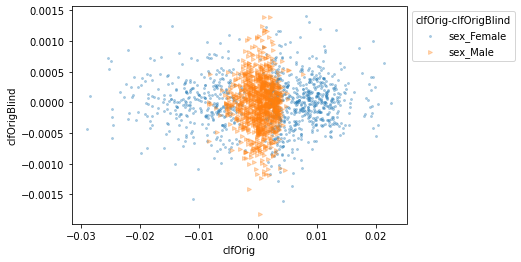

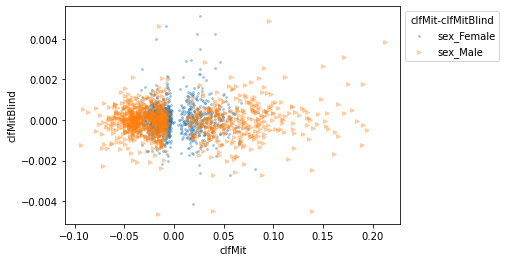

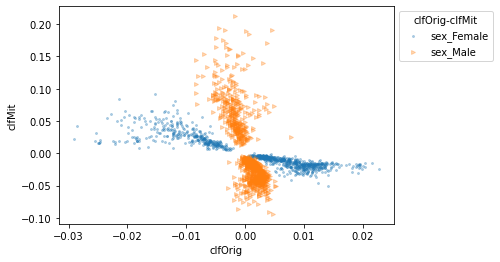

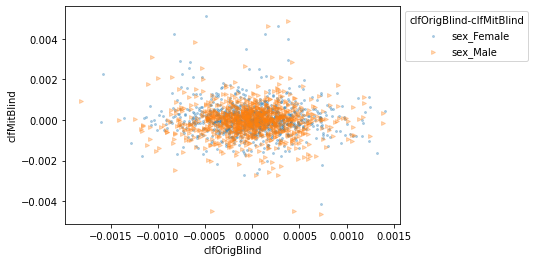

In [29]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [30]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [31]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [32]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [33]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -1.868118           -9.326244       -0.722307   
workclass                  -0.040567            0.463760        0.548230   
education                  -3.541859           -6.469733       -5.580410   
marital-status             -9.818505            0.411194      -12.689047   
occupation                  0.153900           -0.992930       -0.419088   
relationship                4.862701            1.869968        0.127973   
race                        0.286489            1.137287        0.578141   
capital-gain             -358.320155         -390.924078     -195.784222   
capital-loss              -39.328238          -75.891529      -76.187337   
hours-per-week             -4.308745           -6.074609       -5.724394   
native-country             -8.822937           -9.273543      -12.651026   
sex_Female                  0.550455           -2.556719       -1.645584   
sex_Male                   -0.379916           -5.312078       -5.070703   

                clfOrigBlind-clfMitBlind  
age                           -10.472055  
workclass                      -0.125037  
education                      -4.431181  
marital-status                  3.281735  
occupation                     -0.419942  
relationship                    6.604695  
race                            0.845635  
capital-gain                 -553.460011  
capital-loss                  -39.032431  
hours-per-week                 -4.658960  
native-country                 -5.445454  
sex_Female                     -0.360680  
sex_Male                       -0.621291

In [34]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.012067            0.017936        0.013369   
workclass                   0.009611            0.010262        0.012315   
education                   0.010115            0.011982        0.012743   
marital-status              0.016152            0.017887        0.018274   
occupation                  0.009625            0.010183        0.012560   
relationship                0.013205            0.011125        0.014966   
race                        0.009576            0.010529        0.012423   
capital-gain                0.142183            0.274133        0.053664   
capital-loss                0.009851            0.043827        0.043016   
hours-per-week              0.010596            0.013045        0.017283   
native-country              0.009998            0.012136        0.012304   
sex_Female                  0.010650            0.014016        0.019485   
sex_Male                    0.009933            0.024921        0.026787   

                clfOrigBlind-clfMitBlind  
age                             0.013143  
workclass                       0.006493  
education                       0.012190  
marital-status                  0.018746  
occupation                      0.006806  
relationship                    0.014215  
race                            0.006610  
capital-gain                    0.084688  
capital-loss                    0.006684  
hours-per-week                  0.008326  
native-country                  0.006030  
sex_Female                      0.006779  
sex_Male                        0.006472

In [35]:
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.465185            3.934398        3.358144   
SA-Mean               0.010292            0.019469        0.023136   
NSA-Sum              39.213838           45.712261       28.273834   
NSA-Mean              0.022998            0.039368        0.020265   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.490985  
SA-Mean                   0.006626  
NSA-Sum                  57.161558  
NSA-Mean                  0.016721

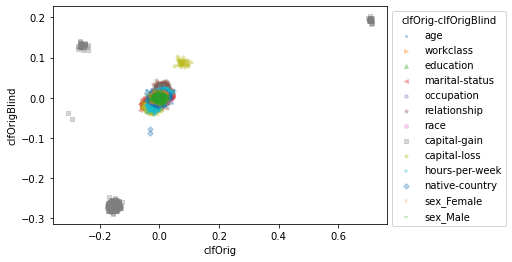

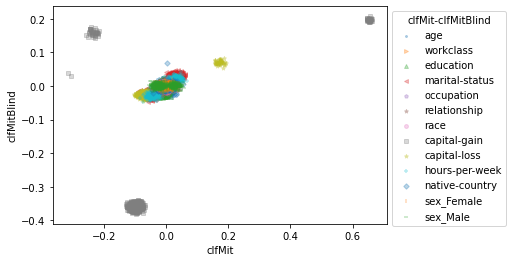

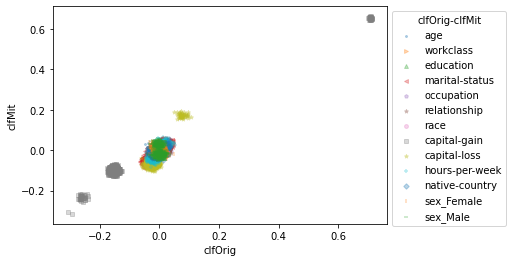

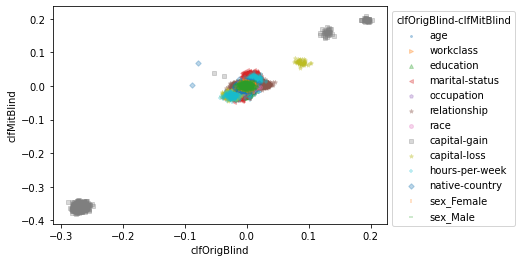

In [36]:
XAIPlots(lime_v,column_names,diffClfs=True)

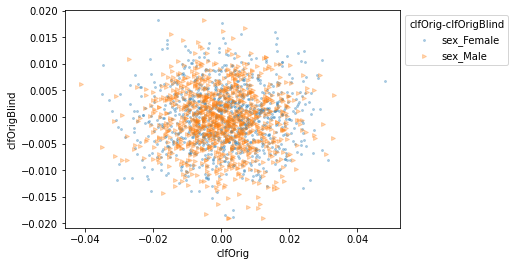

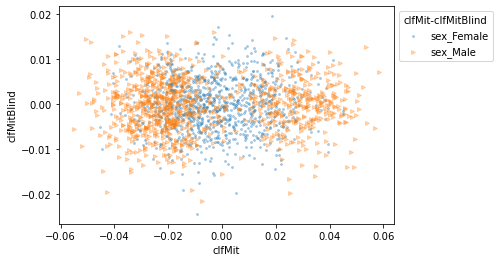

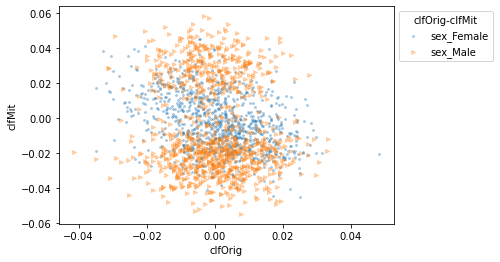

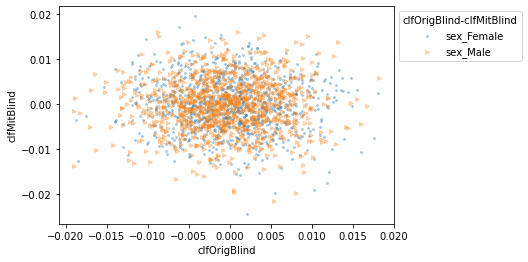

In [37]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [38]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [39]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [40]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [41]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -25.499258          -36.873231      -30.002618   
workclass                   0.924146            4.323189        2.593609   
education                 -22.172672          -24.686285      -23.667076   
marital-status            -30.294912          -44.328540      -56.794398   
occupation                 -3.077222           -5.726991       -3.404080   
relationship               41.515587           32.297583       19.364801   
race                       -0.078854           -1.509167       -0.859256   
capital-gain             -330.374062         -387.305770     -295.834804   
capital-loss              -85.682642         -112.707113      -83.301005   
hours-per-week             -2.568166           -3.908513       -1.687001   
native-country             -8.103996           -7.568577       -8.330070   
sex_Female                  1.592928            1.493128        3.086176   
sex_Male                    0.459889            6.935750        7.404097   

                clfOrigBlind-clfMitBlind  
age                           -32.369870  
workclass                       2.653726  
education                     -23.191881  
marital-status                -17.829053  
occupation                     -5.400133  
relationship                   54.448368  
race                           -0.728764  
capital-gain                 -421.845028  
capital-loss                 -115.088751  
hours-per-week                 -4.789677  
native-country                 -7.342503  
sex_Female                     -0.000120  
sex_Male                       -0.008457

In [42]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.011681            0.023111        0.019987   
workclass                   0.002158            0.005214        0.004142   
education                   0.005908            0.010464        0.010026   
marital-status              0.023882            0.047048        0.026297   
occupation                  0.005048            0.010929        0.008879   
relationship                0.037420            0.016675        0.021699   
race                        0.001500            0.002805        0.002623   
capital-gain                0.055168            0.116489        0.037385   
capital-loss                0.011396            0.025400        0.024063   
hours-per-week              0.007669            0.017823        0.018226   
native-country              0.004416            0.006184        0.005530   
sex_Female                  0.008669            0.017711        0.026367   
sex_Male                    0.001925            0.041718        0.043356   

                clfOrigBlind-clfMitBlind  
age                             0.017249  
workclass                       0.005027  
education                       0.011416  
marital-status                  0.018295  
occupation                      0.008558  
relationship                    0.051258  
race                            0.002802  
capital-gain                    0.071802  
capital-loss                    0.028152  
hours-per-week                  0.012501  
native-country                  0.005220  
sex_Female                      0.000610  
sex_Male                        0.000620

In [43]:
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.026408            4.214439        5.245136   
SA-Mean               0.005297            0.029714        0.034862   
NSA-Sum              50.026501           60.112269       47.803520   
NSA-Mean              0.015113            0.025649        0.016260   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.004289  
SA-Mean                   0.000615  
NSA-Sum                  62.335250  
NSA-Mean                  0.021116

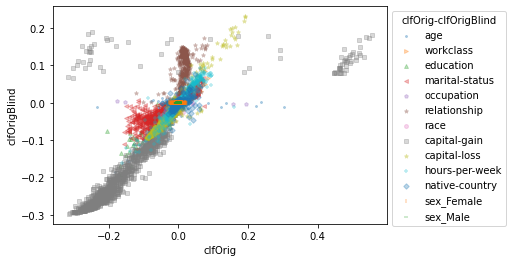

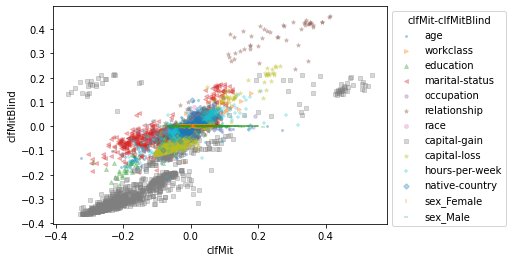

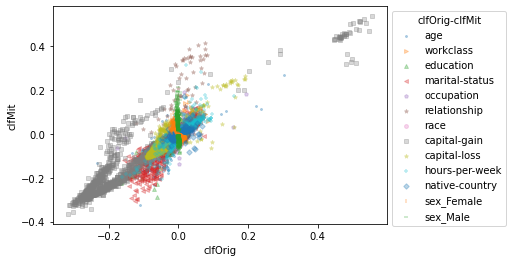

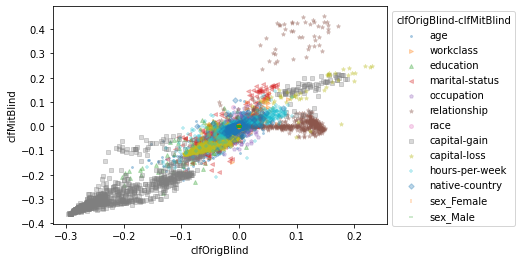

In [44]:
XAIPlots(shap_v,column_names,diffClfs=True)

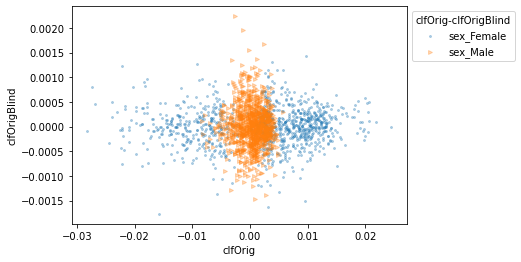

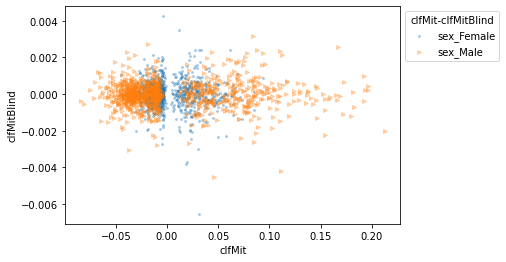

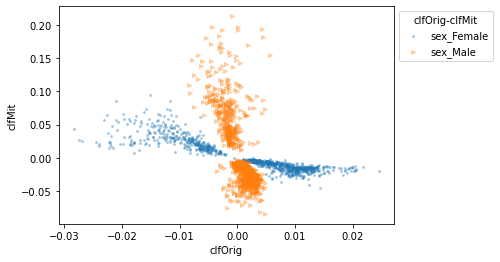

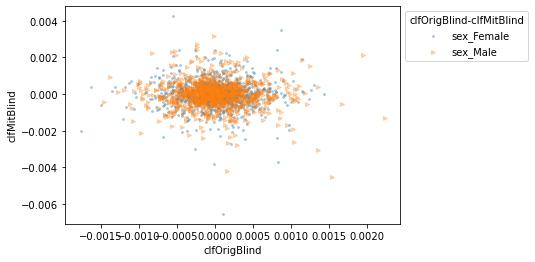

In [45]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [46]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [47]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [48]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [49]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -1.589177          -10.019145       -1.185831   
workclass                  -0.041702            0.524521        0.653774   
education                  -3.485576           -6.112302       -5.490892   
marital-status             -9.556657            0.746189      -11.852934   
occupation                  0.091003           -1.050875       -0.383819   
relationship                4.832529            0.669872        0.031601   
race                        0.246750            1.149497        0.495462   
capital-gain             -355.000998         -413.260275     -209.687102   
capital-loss              -39.145507          -71.190813      -72.036995   
hours-per-week             -4.206872           -6.310630       -5.485414   
native-country             -8.776212           -9.255299      -13.467840   
sex_Female                  0.555385           -3.067591       -2.178187   
sex_Male                   -0.359740           -5.430599       -5.292054   

                clfOrigBlind-clfMitBlind  
age                           -10.422491  
workclass                      -0.170955  
education                      -4.106986  
marital-status                  3.042466  
occupation                     -0.576053  
relationship                    5.470800  
race                            0.900785  
capital-gain                 -558.574171  
capital-loss                  -38.299324  
hours-per-week                 -5.032088  
native-country                 -4.563671  
sex_Female                     -0.334019  
sex_Male                       -0.498285

In [50]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.012245            0.016825        0.013757   
workclass                   0.009633            0.010391        0.012360   
education                   0.010101            0.010908        0.012872   
marital-status              0.015599            0.016728        0.016733   
occupation                  0.009651            0.010034        0.012539   
relationship                0.013273            0.011467        0.013923   
race                        0.009589            0.010432        0.012523   
capital-gain                0.145522            0.264091        0.031490   
capital-loss                0.009904            0.042970        0.042947   
hours-per-week              0.010610            0.011947        0.017391   
native-country              0.009981            0.012637        0.012228   
sex_Female                  0.010637            0.013907        0.019409   
sex_Male                    0.009882            0.024454        0.026338   

                clfOrigBlind-clfMitBlind  
age                             0.014416  
workclass                       0.006578  
education                       0.011138  
marital-status                  0.017491  
occupation                      0.006833  
relationship                    0.011591  
race                            0.006578  
capital-gain                    0.091522  
capital-loss                    0.006306  
hours-per-week                  0.009435  
native-country                  0.006247  
sex_Female                      0.006764  
sex_Male                        0.006360

In [51]:
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                0.457562            4.249095        3.735121   
SA-Mean               0.010259            0.019180        0.022874   
NSA-Sum              38.815726           47.299038       29.161060   
NSA-Mean              0.023283            0.038039        0.018069   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.416152  
SA-Mean                   0.006562  
NSA-Sum                  57.378163  
NSA-Mean                  0.017103

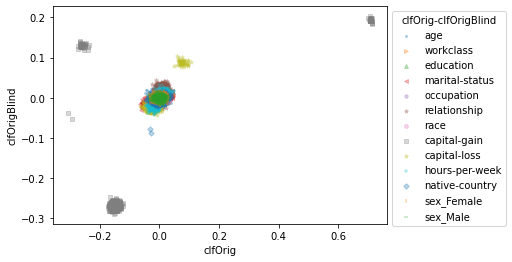

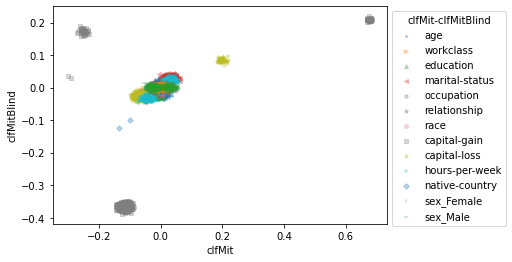

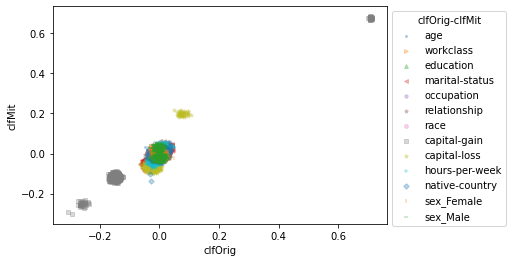

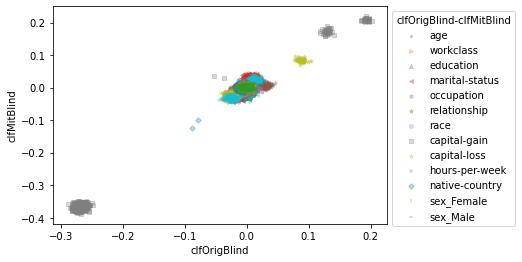

In [52]:
XAIPlots(lime_v,column_names,diffClfs=True)

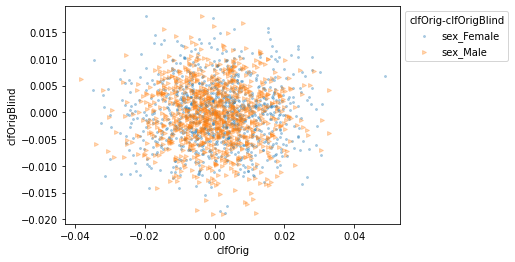

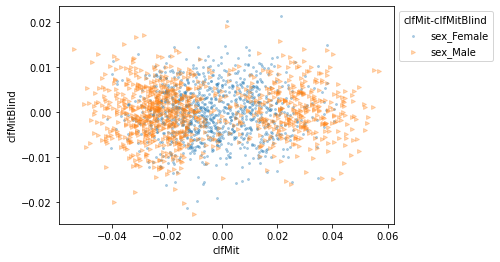

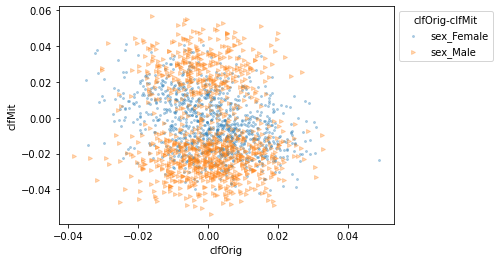

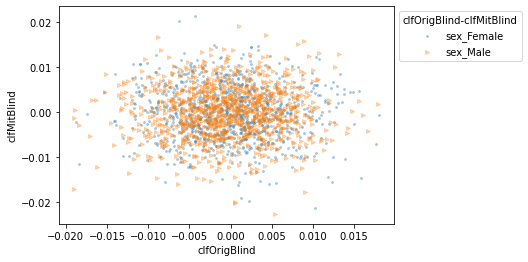

In [53]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [54]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [55]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [56]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                  -26.329886     -36.607388                 -24.044249   
workclass              1.242905       4.391532                   0.624286   
education            -21.706198     -24.071217                 -22.715527   
marital-status       -42.647075     -76.294127                 -18.047560   
occupation            -2.549199      -4.131494                  -3.659823   
relationship           7.920229      30.648587                  75.127378   
race                  -0.138593      -1.505504                   0.094742   
capital-gain        -303.898615    -267.936420                -358.017480   
capital-loss         -76.811755     -86.797554                 -94.078727   
hours-per-week        -1.332391      -3.659833                  -5.192852   
native-country        -8.645329      -8.309218                  -7.910801   
sex_Female             3.016404       1.795767                   0.001252   
sex_Male               0.859501      11.121088                  -0.005173   

                clfMitBlind-clfMitBlind  
age                          -38.852617  
workclass                      4.792697  
education                    -24.372721  
marital-status               -19.874196  
occupation                    -7.009797  
relationship                  33.398495  
race                          -1.323900  
capital-gain                -481.809360  
capital-loss                -137.661583  
hours-per-week                -2.571013  
native-country                -7.291909  
sex_Female                     0.040180  
sex_Male                      -0.051911

In [57]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.001299       0.004043                   0.000973   
workclass              0.000507       0.001089                   0.000460   
education              0.000633       0.003639                   0.000518   
marital-status         0.000785       0.005677                   0.000589   
occupation             0.000518       0.002197                   0.000454   
relationship           0.000486       0.002066                   0.000592   
race                   0.000496       0.001248                   0.000435   
capital-gain           0.006336       0.026167                   0.005165   
capital-loss           0.002426       0.002676                   0.001574   
hours-per-week         0.002020       0.003602                   0.000793   
native-country         0.000606       0.001280                   0.000493   
sex_Female             0.000523       0.001848                   0.000431   
sex_Male               0.000456       0.003302                   0.000440   

                clfMitBlind-clfMitBlind  
age                            0.001658  
workclass                      0.000821  
education                      0.001482  
marital-status                 0.002174  
occupation                     0.000988  
relationship                   0.001664  
race                           0.000797  
capital-gain                   0.001865  
capital-loss                   0.001711  
hours-per-week                 0.001725  
native-country                 0.000947  
sex_Female                     0.000724  
sex_Male                       0.000774

In [58]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           1.937953       6.458428                   0.003212   
SA-Mean          0.000490       0.002575                   0.000436   
NSA-Sum         44.838380      49.486625                  55.410311   
NSA-Mean         0.001465       0.004880                   0.001095   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.046045  
SA-Mean                  0.000749  
NSA-Sum                 68.996208  
NSA-Mean                 0.001439

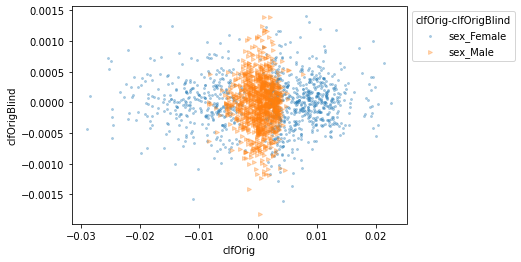

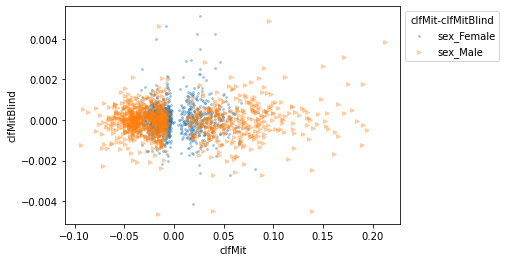

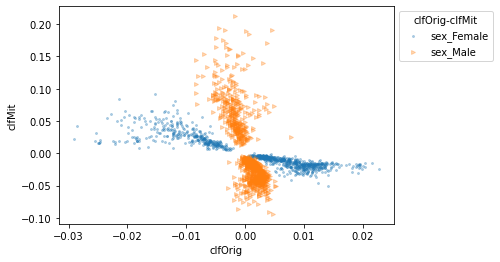

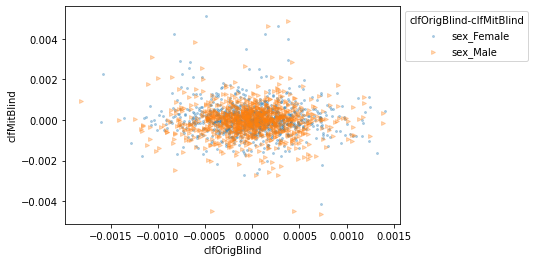

In [59]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [60]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [61]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [62]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -0.937823      -0.970316                  -2.519472   
workclass             -0.093265       1.295269                   0.010996   
education             -4.878559      -6.192742                  -2.148876   
marital-status       -12.847892     -11.694089                  -6.527270   
occupation             0.595756      -1.398662                  -0.350852   
relationship           0.064215       0.095358                   9.631014   
race                  -0.414987       1.488590                   0.948226   
capital-gain        -241.740023    -163.731301                -471.581130   
capital-loss         -42.084138    -106.140194                 -36.389607   
hours-per-week        -4.082304      -7.127504                  -4.433313   
native-country       -10.709604     -15.409261                  -6.889544   
sex_Female             1.453044      -5.276816                  -0.347205   
sex_Male               0.148327     -10.511083                  -0.887982   

                clfMitBlind-clfMitBlind  
age                          -18.375073  
workclass                     -0.306988  
education                     -6.389292  
marital-status                12.851471  
occupation                    -0.645144  
relationship                   2.444482  
race                           0.798194  
capital-gain                -640.453052  
capital-loss                 -40.942148  
hours-per-week                -5.257735  
native-country                -3.119581  
sex_Female                    -0.347494  
sex_Male                      -0.231593

In [63]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.000900       0.004810                   0.000088   
workclass              0.000799       0.002568                   0.000093   
education              0.000805       0.006781                   0.000090   
marital-status         0.000974       0.004739                   0.000088   
occupation             0.000785       0.002811                   0.000090   
relationship           0.000784       0.003319                   0.000094   
race                   0.000752       0.003171                   0.000090   
capital-gain           0.003378       0.019136                   0.000098   
capital-loss           0.003160       0.008005                   0.001269   
hours-per-week         0.001071       0.002783                   0.000095   
native-country         0.000789       0.008016                   0.000082   
sex_Female             0.000797       0.002926                   0.000088   
sex_Male               0.000762       0.003027                   0.000088   

                clfMitBlind-clfMitBlind  
age                            0.003211  
workclass                      0.001977  
education                      0.003715  
marital-status                 0.002000  
occupation                     0.001686  
relationship                   0.004343  
race                           0.001645  
capital-gain                   0.006976  
capital-loss                   0.004398  
hours-per-week                 0.002411  
native-country                 0.002667  
sex_Female                     0.001681  
sex_Male                       0.001924

In [64]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           0.800685       7.893950                   0.617594   
SA-Mean          0.000779       0.002977                   0.000088   
NSA-Sum         28.949870      28.685753                  49.220936   
NSA-Mean         0.001291       0.006013                   0.000198   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.289543  
SA-Mean                  0.001803  
NSA-Sum                 66.507560  
NSA-Mean                 0.003184

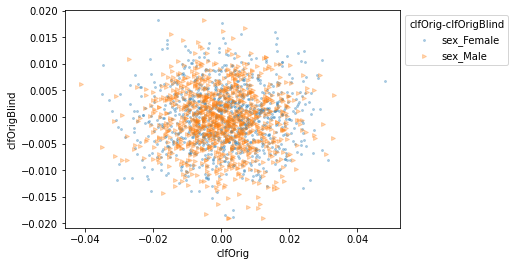

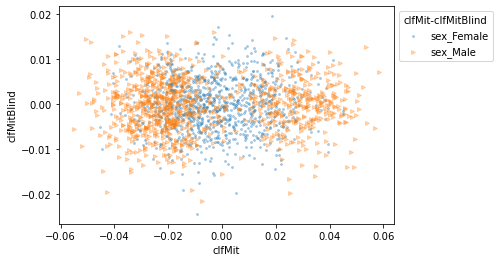

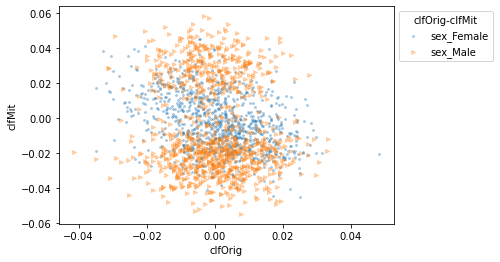

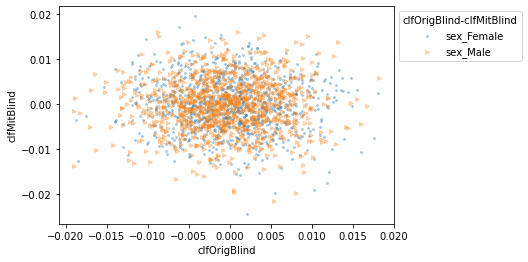

In [65]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [66]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [67]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_RF_Performances.csv')
res

Original Train Dimension = 22792
Mitigated Train Dimension = 22792
Test Dimension = 1000
---> CLF Original: 
Favoured attribute value: [ sex_Male ] Freq.: [ 654 ] Labeled as + class: [ 130 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 346 ] Labeled as + class: [ 17 ]
---> CLF Mitigated: 
Favoured attribute value: [ sex_Male ] Freq.: [ 654 ] Labeled as + class: [ 62 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 346 ] Labeled as + class: [ 62 ]
---> CLF Original Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 654 ] Labeled as + class: [ 140 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 346 ] Labeled as + class: [ 17 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ sex_Male ] Freq.: [ 654 ] Labeled as + class: [ 64 ]
Unfavoured attribute value: [ sex_Female ] Freq.: [ 346 ] Labeled as + class: [ 61 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.832000            0.834000       0.834000   
Precision           0.696446            0.695379       0.710974   
Recall              0.500370            0.517576       0.487697   
F1 Score            0.580221            0.591453       0.576106   
Discrimination      0.149644            0.164934      -0.084390   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.829000  CLF Original Blind    0.002000   
Precision                  0.682095       CLF Mitigated    0.001067   
Recall                     0.504533  CLF Original Blind    0.017206   
F1 Score                   0.579329  CLF Original Blind    0.011232   
Discrimination            -0.078441       CLF Mitigated    0.015291   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.005000   0.002000     0.005000  
Precision         0.028878   0.014528     0.013284  
Recall            0.016836   0.012673     0.013043  
F1 Score          0.003223   0.004114     0.012124  
Discrimination    0.005948   0.234033     0.243376

In [68]:

PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [69]:
PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [70]:
res = pd.read_csv(path_res+'PS_RF_Performances.csv',index_col=0)
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.832000            0.834000       0.834000   
Precision           0.696446            0.695379       0.710974   
Recall              0.500370            0.517576       0.487697   
F1 Score            0.580221            0.591453       0.576106   
Discrimination      0.149644            0.164934      -0.084390   

                CLF Mitigated Blind          Best Score  Delta O-OB  \
Accuracy                   0.829000  CLF Original Blind    0.002000   
Precision                  0.682095       CLF Mitigated    0.001067   
Recall                     0.504533  CLF Original Blind    0.017206   
F1 Score                   0.579329  CLF Original Blind    0.011232   
Discrimination            -0.078441       CLF Mitigated    0.015291   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.005000   0.002000     0.005000  
Precision         0.028878   0.014528     0.013284  
Recall            0.016836   0.012673     0.013043  
F1 Score          0.003223   0.004114     0.012124  
Discrimination    0.005948   0.234033     0.243376

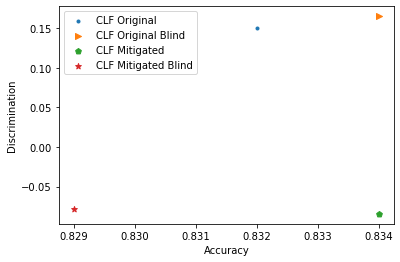

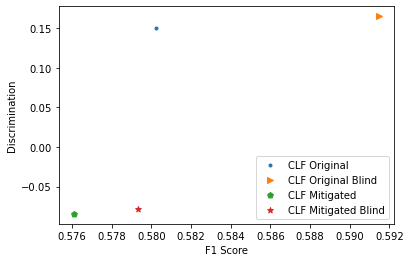

In [71]:
plotDisc(res)

In [72]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *sexes* feature has the following distribution:
    * "('sex_Female',)" grouping has 346 instances.
    * "('sex_Male',)" grouping has 654 instances.

The class distribution per sub-population:
    * For the "('sex_Female',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 299 data points.
        - The class *>50K* has 47 data points.
    * For the "('sex_Male',)" grouping the classes are distributed as follows:
        - The class *<=50K* has 467 data points.
        - The class *>50K* has 187 data points.


In [73]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:
The *Equal Accuracy* group-based fairness metric for *sexes* feature split are:
The *Equal Opportunity* group-based fairness metric for *sexes* feature split are:
The *Demographic Parity* group-based fairness metric for *sexes* feature split are:


{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

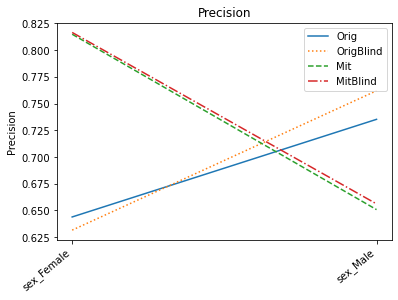

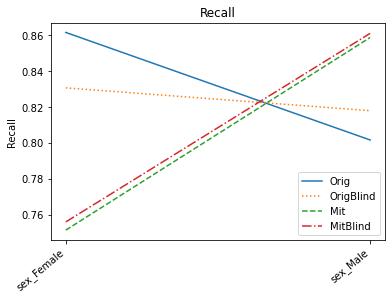

In [74]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [75]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [76]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [77]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [78]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -33.248448          -54.059316      -41.286189   
workclass                   1.521914            0.944463        1.072178   
education                 -23.885765          -20.800935      -19.467113   
marital-status            -12.835578           -8.892260      -11.084359   
occupation                 30.742525           21.289037       24.896582   
relationship              117.880033           95.834484      103.511516   
race                       -0.070301            0.502882        0.236892   
capital-gain             -245.988006         -302.842012     -264.827296   
capital-loss              -47.584717          -58.500335      -49.936693   
hours-per-week            -13.319221           -3.820871       -7.962903   
native-country              1.069530            0.046873        0.393707   
sex_Female                  0.994356            8.345618        9.351485   
sex_Male                    1.562146            5.078729        6.643786   

                clfOrigBlind-clfMitBlind  
age                           -46.021574  
workclass                       1.394199  
education                     -25.219587  
marital-status                -10.643479  
occupation                     27.134980  
relationship                  110.203000  
race                            0.195689  
capital-gain                 -284.002722  
capital-loss                  -56.148359  
hours-per-week                 -9.177188  
native-country                  0.722696  
sex_Female                     -0.011511  
sex_Male                       -0.002911

In [79]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002614            0.007197        0.011618   
workclass                   0.000551            0.001039        0.001334   
education                   0.003448            0.005223        0.005910   
marital-status              0.002164            0.008309        0.007172   
occupation                  0.002294            0.003816        0.007690   
relationship                0.006325            0.018419        0.041941   
race                        0.000381            0.000464        0.000710   
capital-gain                0.021231            0.005834        0.043708   
capital-loss                0.005804            0.003599        0.009264   
hours-per-week              0.002972            0.005436        0.012667   
native-country              0.000328            0.000331        0.000975   
sex_Female                  0.006672            0.022577        0.028037   
sex_Male                    0.007522            0.022690        0.029297   

                clfOrigBlind-clfMitBlind  
age                             0.017036  
workclass                       0.001805  
education                       0.006840  
marital-status                  0.009919  
occupation                      0.005897  
relationship                    0.063688  
race                            0.000594  
capital-gain                    0.026136  
capital-loss                    0.007180  
hours-per-week                  0.011519  
native-country                  0.000849  
sex_Female                      0.000162  
sex_Male                        0.000172

In [80]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.278251            6.712174        7.997636   
SA-Mean               0.007097            0.022634        0.028667   
NSA-Sum              48.013276           51.593951       47.697766   
NSA-Mean              0.004374            0.005424        0.012999   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.007211  
SA-Mean                   0.000167  
NSA-Sum                  51.896679  
NSA-Mean                  0.013770

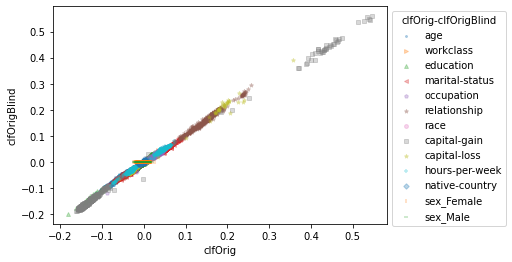

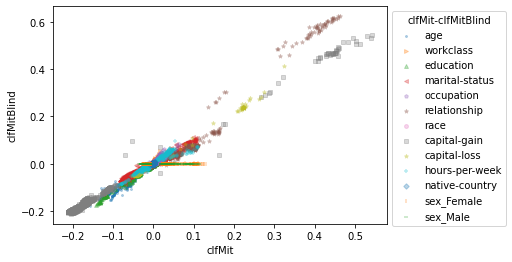

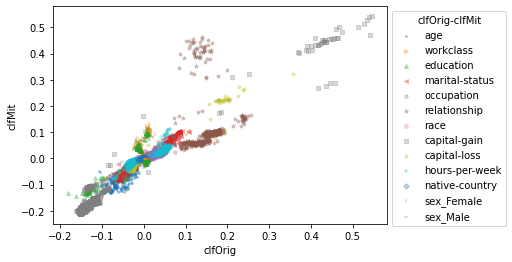

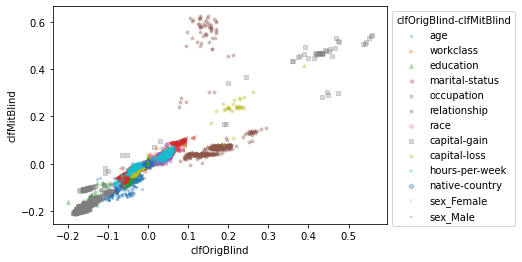

In [81]:
XAIPlots(shap_v,column_names,diffClfs=True)

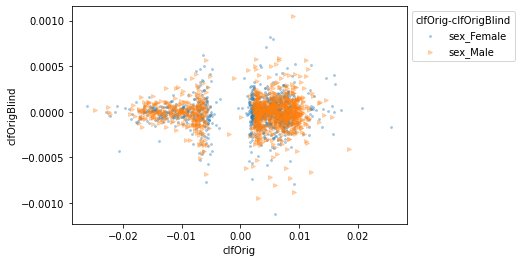

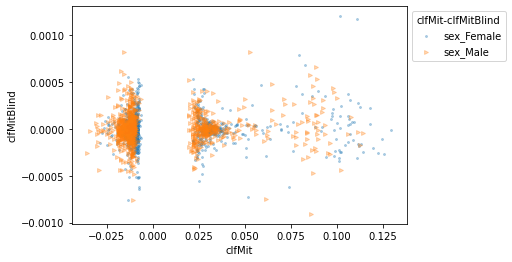

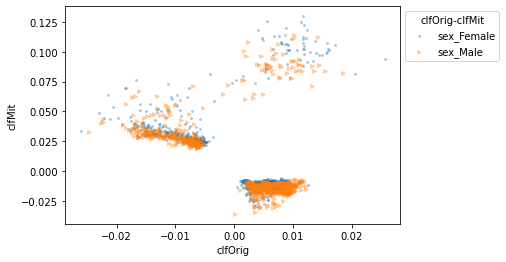

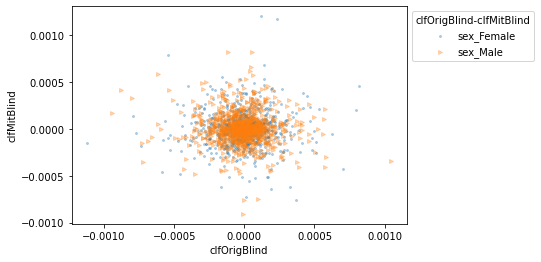

In [82]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [83]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [84]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [85]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [86]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -1.086208           -7.365820       -3.947413   
workclass                   0.444681           -0.002077        0.158715   
education                   0.139978           -3.927756       -1.889891   
marital-status             15.366947            4.734956        8.467892   
occupation                 -1.040130           -1.534456       -1.218294   
relationship              -25.084965            5.698109      -10.133169   
race                        0.309250            0.115472        0.249293   
capital-gain               -4.656111          -13.026793       -8.165362   
capital-loss                2.940531            3.899492        3.249037   
hours-per-week              0.751678           -0.566621        0.617940   
native-country             -0.081371           -0.159003       -0.142372   
sex_Female                  2.029406           -1.093162        0.936244   
sex_Male                    1.934304           -1.776844        0.157461   

                clfOrigBlind-clfMitBlind  
age                            -4.504615  
workclass                       0.283888  
education                      -1.897887  
marital-status                 11.634011  
occupation                     -1.356293  
relationship                   -9.253688  
race                            0.175430  
capital-gain                   -9.517542  
capital-loss                    3.590987  
hours-per-week                 -0.432883  
native-country                 -0.098002  
sex_Female                      0.000000  
sex_Male                        0.000000

In [87]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.003020            0.006419        0.018973   
workclass                   0.000897            0.001051        0.001644   
education                   0.004704            0.002392        0.005182   
marital-status              0.003692            0.006864        0.008110   
occupation                  0.002234            0.002602        0.005339   
relationship                0.012193            0.010676        0.063254   
race                        0.000261            0.000480        0.000624   
capital-gain                0.002254            0.003653        0.009846   
capital-loss                0.001932            0.001381        0.003480   
hours-per-week              0.002667            0.004301        0.010830   
native-country              0.000286            0.000179        0.000664   
sex_Female                  0.010056            0.016039        0.025869   
sex_Male                    0.009556            0.015377        0.024722   

                clfOrigBlind-clfMitBlind  
age                             0.023308  
workclass                       0.002478  
education                       0.007837  
marital-status                  0.008993  
occupation                      0.005482  
relationship                    0.083173  
race                            0.000741  
capital-gain                    0.011192  
capital-loss                    0.003079  
hours-per-week                  0.009399  
native-country                  0.000523  
sex_Female                      0.000000  
sex_Male                        0.000000

In [88]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix_Tree.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.981855            1.435003        0.546852   
SA-Mean               0.009806            0.015708        0.025296   
NSA-Sum               4.718350            3.730051        3.476307   
NSA-Mean              0.003104            0.003636        0.011631   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   3.885929  
NSA-Mean                  0.014200

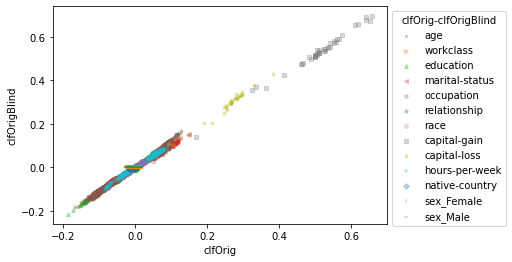

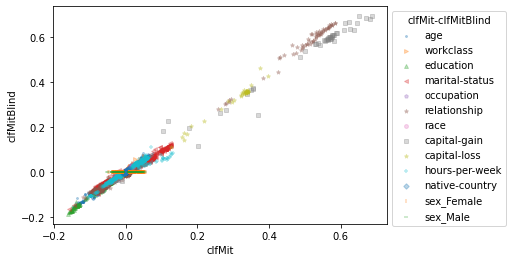

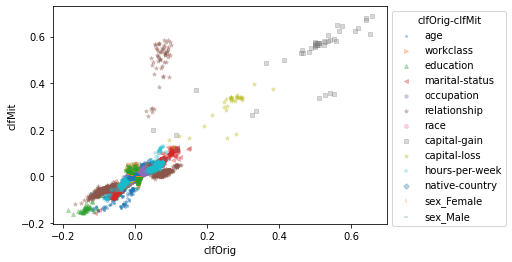

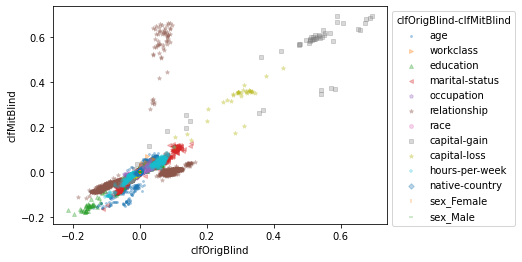

In [89]:
XAIPlots(shap_v,column_names,diffClfs=True)

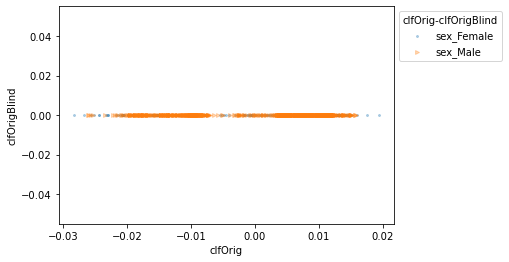

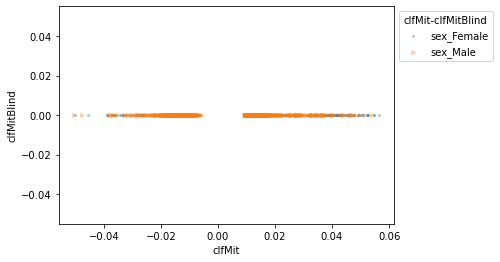

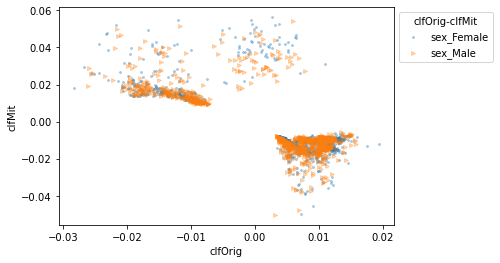

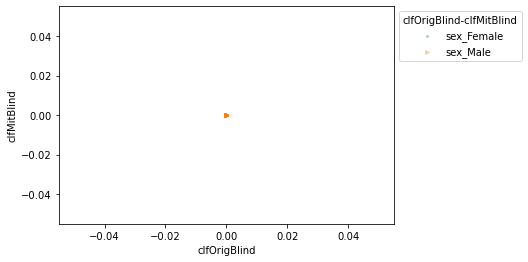

In [90]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [91]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [92]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [93]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [94]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -28.101390          -44.675904      -34.219023   
workclass                  -1.166728           -0.568981       -0.304673   
education                  -8.321149           -7.115098       -8.879242   
marital-status              5.513528            9.005073        4.171514   
occupation                  9.942292            7.621260        8.686951   
relationship               21.598741           12.732582       16.113122   
race                        1.058007            1.520222        1.377097   
capital-gain             -375.860172         -409.700814     -382.574158   
capital-loss              -90.093423          -76.875809      -92.100967   
hours-per-week            -28.337692          -16.657542      -20.589869   
native-country              4.202777            1.045864        2.731897   
sex_Female                 -1.769324            8.041225        5.825657   
sex_Male                   -1.178359            6.456586        4.956467   

                clfOrigBlind-clfMitBlind  
age                           -38.558272  
workclass                      -1.431037  
education                      -6.557005  
marital-status                 10.347087  
occupation                      8.876601  
relationship                   18.218201  
race                            1.201131  
capital-gain                 -402.986828  
capital-loss                  -74.868266  
hours-per-week                -24.405365  
native-country                  2.516745  
sex_Female                      0.446244  
sex_Male                        0.321761

In [95]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.012431            0.014474        0.012725   
workclass                   0.009922            0.010787        0.010115   
education                   0.014154            0.011481        0.011808   
marital-status              0.011694            0.011055        0.011237   
occupation                  0.010686            0.011217        0.011253   
relationship                0.014192            0.013155        0.017197   
race                        0.010227            0.011244        0.010671   
capital-gain                0.012777            0.013284        0.020216   
capital-loss                0.022970            0.011807        0.021000   
hours-per-week              0.011532            0.011370        0.015819   
native-country              0.009649            0.010243        0.010364   
sex_Female                  0.012712            0.029991        0.036816   
sex_Male                    0.013302            0.029933        0.038877   

                clfOrigBlind-clfMitBlind  
age                             0.023007  
workclass                       0.011152  
education                       0.016838  
marital-status                  0.011024  
occupation                      0.010734  
relationship                    0.032691  
race                            0.010893  
capital-gain                    0.020056  
capital-loss                    0.013042  
hours-per-week                  0.015892  
native-country                  0.009594  
sex_Female                      0.011000  
sex_Male                        0.010850

In [96]:
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Fix.csv')
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Fix.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.473841            7.248906        5.391062   
SA-Mean               0.013007            0.029962        0.037847   
NSA-Sum              52.199627           53.410832       51.977137   
NSA-Mean              0.012749            0.011829        0.013855   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.384002  
SA-Mean                   0.010925  
NSA-Sum                  53.633322  
NSA-Mean                  0.015902

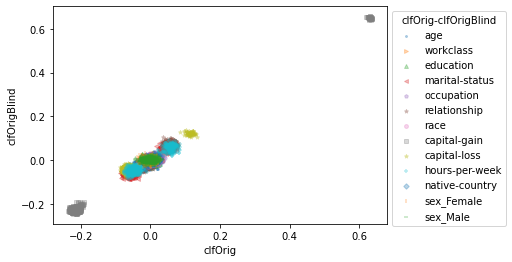

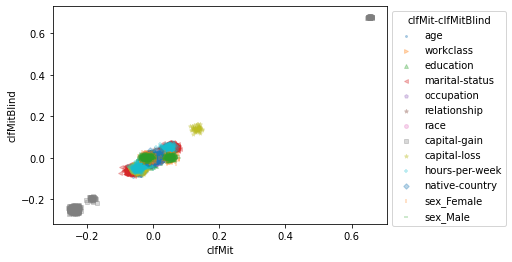

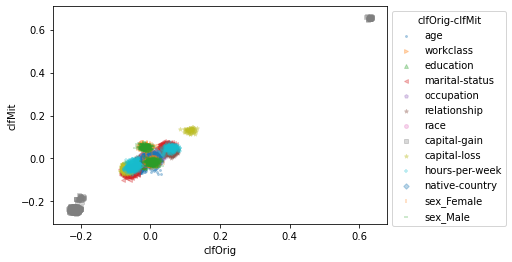

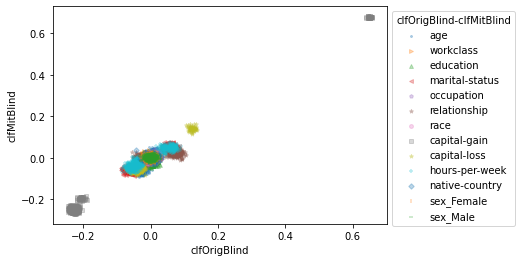

In [97]:
XAIPlots(lime_v,column_names,diffClfs=True)

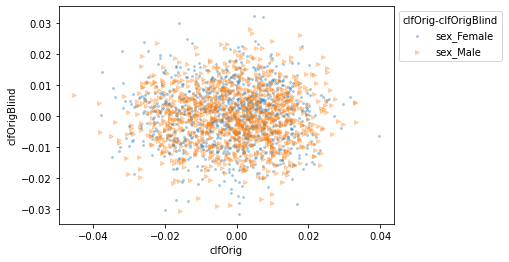

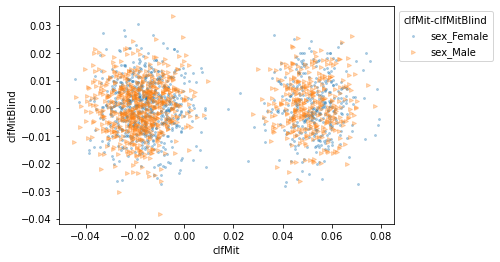

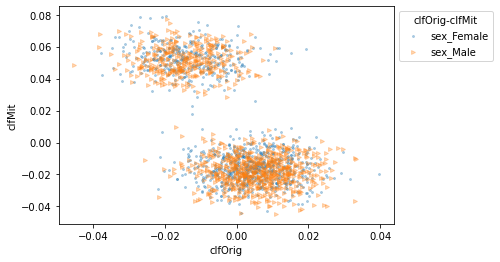

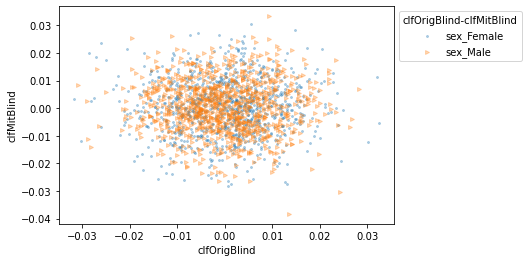

In [98]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [99]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [100]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [101]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [102]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -35.588709          -58.512247      -43.933737   
workclass                   1.506894            0.806418        0.933471   
education                 -24.180325          -22.186423      -20.223223   
marital-status            -17.905290          -11.807601      -16.650020   
occupation                 28.961036           18.393230       22.924092   
relationship              114.668528           93.186809      102.582227   
race                       -0.289804            0.319454        0.016616   
capital-gain             -255.353698         -286.480549     -262.565353   
capital-loss              -50.419274          -60.318081      -57.436273   
hours-per-week            -13.296445           -5.614342       -9.526495   
native-country              1.037034           -0.008056        0.361596   
sex_Female                  1.222650            9.659271       10.882280   
sex_Male                    1.805703            8.624873       10.439918   

                clfOrigBlind-clfMitBlind  
age                           -50.167219  
workclass                       1.379841  
education                     -26.143525  
marital-status                -13.062871  
occupation                     24.430174  
relationship                  105.273110  
race                            0.013034  
capital-gain                 -279.268895  
capital-loss                  -53.301083  
hours-per-week                 -9.384292  
native-country                  0.667382  
sex_Female                     -0.000359  
sex_Male                       -0.009343

In [103]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.002708            0.007658        0.012121   
workclass                   0.000600            0.001140        0.001329   
education                   0.006593            0.003328        0.004748   
marital-status              0.002598            0.012239        0.008395   
occupation                  0.002227            0.003516        0.006906   
relationship                0.008373            0.020384        0.042177   
race                        0.000460            0.000476        0.000690   
capital-gain                0.017225            0.005320        0.029956   
capital-loss                0.002316            0.003347        0.008478   
hours-per-week              0.002729            0.005306        0.012669   
native-country              0.000329            0.000303        0.000985   
sex_Female                  0.006602            0.021860        0.027193   
sex_Male                    0.007594            0.021479        0.028147   

                clfOrigBlind-clfMitBlind  
age                             0.017929  
workclass                       0.001907  
education                       0.008338  
marital-status                  0.011873  
occupation                      0.006927  
relationship                    0.067535  
race                            0.000619  
capital-gain                    0.017784  
capital-loss                    0.008431  
hours-per-week                  0.010716  
native-country                  0.000897  
sex_Female                      0.000162  
sex_Male                        0.000169

In [104]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.514177            9.142072       10.661099   
SA-Mean               0.007098            0.021669        0.027670   
NSA-Sum              49.382458           50.693928       48.832100   
NSA-Mean              0.004196            0.005729        0.011678   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.004851  
SA-Mean                   0.000165  
NSA-Sum                  51.190130  
NSA-Mean                  0.013905

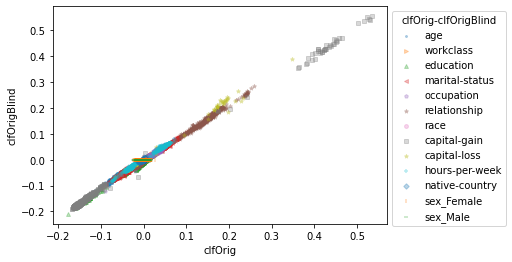

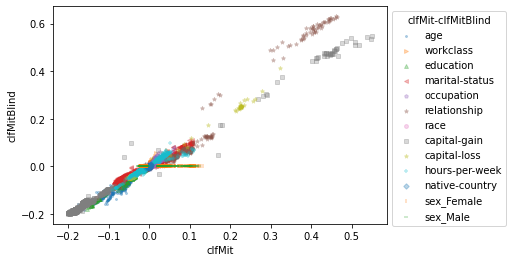

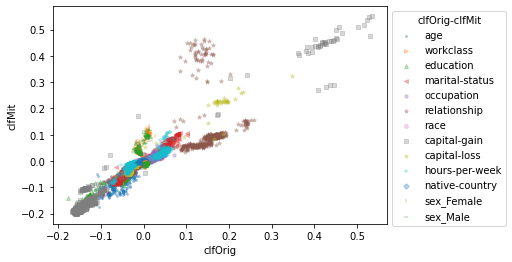

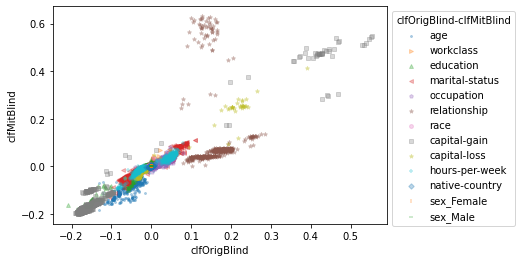

In [105]:
XAIPlots(shap_v,column_names,diffClfs=True)

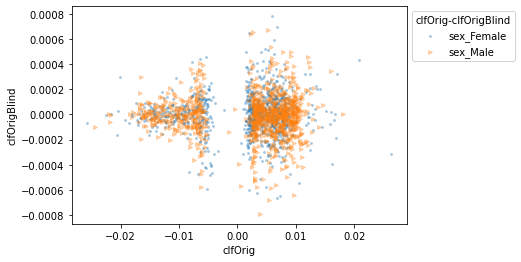

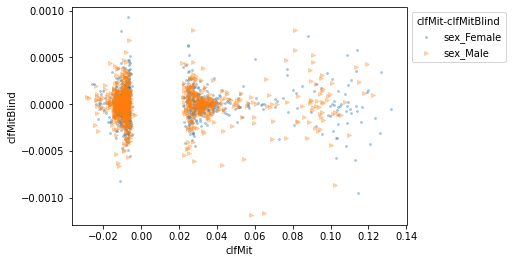

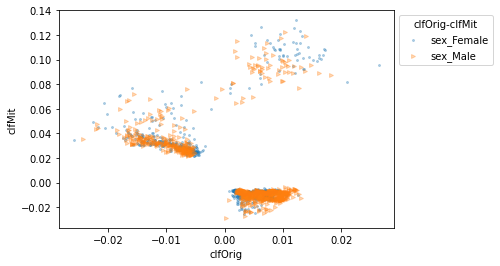

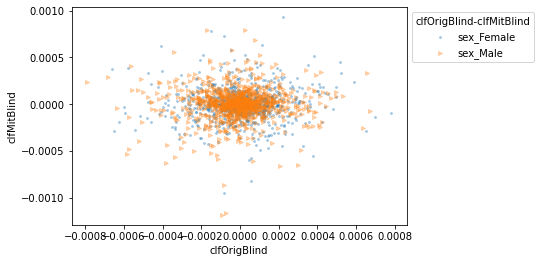

In [106]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [107]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [108]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [109]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [110]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                        -1.086208           -7.365820       -3.947413   
workclass                   0.444681           -0.002077        0.158715   
education                   0.139978           -3.927756       -1.889891   
marital-status             15.366947            4.734956        8.467892   
occupation                 -1.040130           -1.534456       -1.218294   
relationship              -25.084965            5.698109      -10.133169   
race                        0.309250            0.115472        0.249293   
capital-gain               -4.656111          -13.026793       -8.165362   
capital-loss                2.940531            3.899492        3.249037   
hours-per-week              0.751678           -0.566621        0.617940   
native-country             -0.081371           -0.159003       -0.142372   
sex_Female                  2.029406           -1.093162        0.936244   
sex_Male                    1.934304           -1.776844        0.157461   

                clfOrigBlind-clfMitBlind  
age                            -4.504615  
workclass                       0.283888  
education                      -1.897887  
marital-status                 11.634011  
occupation                     -1.356293  
relationship                   -9.253688  
race                            0.175430  
capital-gain                   -9.517542  
capital-loss                    3.590987  
hours-per-week                 -0.432883  
native-country                 -0.098002  
sex_Female                      0.000000  
sex_Male                        0.000000

In [111]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.003020            0.006419        0.018973   
workclass                   0.000897            0.001051        0.001644   
education                   0.004704            0.002392        0.005182   
marital-status              0.003692            0.006864        0.008110   
occupation                  0.002234            0.002602        0.005339   
relationship                0.012193            0.010676        0.063254   
race                        0.000261            0.000480        0.000624   
capital-gain                0.002254            0.003653        0.009846   
capital-loss                0.001932            0.001381        0.003480   
hours-per-week              0.002667            0.004301        0.010830   
native-country              0.000286            0.000179        0.000664   
sex_Female                  0.010056            0.016039        0.025869   
sex_Male                    0.009556            0.015377        0.024722   

                clfOrigBlind-clfMitBlind  
age                             0.023308  
workclass                       0.002478  
education                       0.007837  
marital-status                  0.008993  
occupation                      0.005482  
relationship                    0.083173  
race                            0.000741  
capital-gain                    0.011192  
capital-loss                    0.003079  
hours-per-week                  0.009399  
native-country                  0.000523  
sex_Female                      0.000000  
sex_Male                        0.000000

In [112]:
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change_Tree.csv')
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.981855            1.435003        0.546852   
SA-Mean               0.009806            0.015708        0.025296   
NSA-Sum               4.718350            3.730051        3.476307   
NSA-Mean              0.003104            0.003636        0.011631   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.000000  
SA-Mean                   0.000000  
NSA-Sum                   3.885929  
NSA-Mean                  0.014200

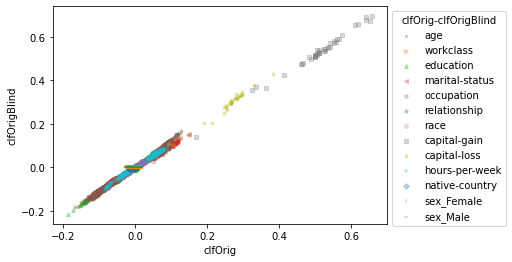

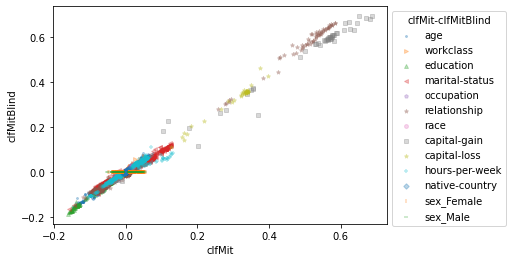

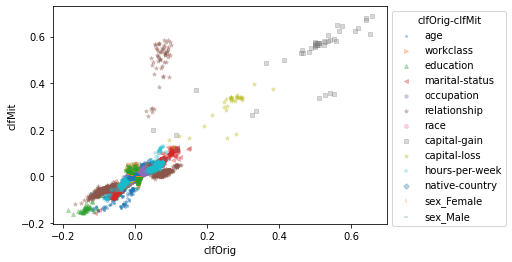

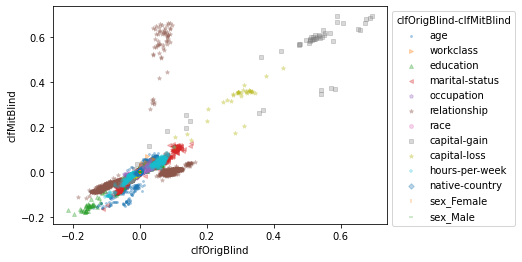

In [113]:
XAIPlots(shap_v,column_names,diffClfs=True)

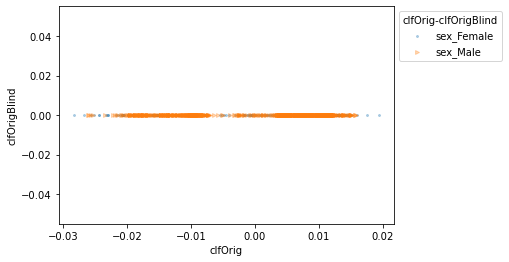

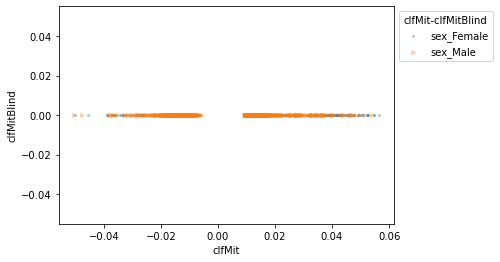

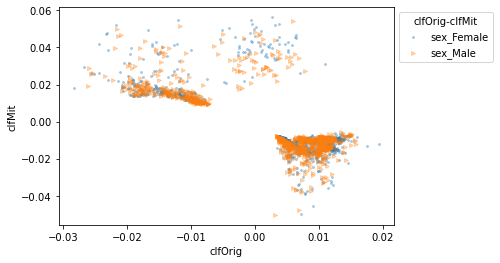

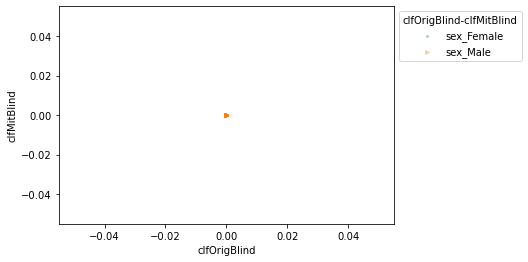

In [114]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [115]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [116]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [117]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [118]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                       -28.068965          -45.024828      -35.425439   
workclass                  -1.216714           -0.887509       -0.616953   
education                  -8.357714          -11.556593      -11.634628   
marital-status              5.539132            9.026768        4.348996   
occupation                  9.895515            9.594268        9.276219   
relationship               21.571385           13.641819       17.163001   
race                        1.026374            1.461217        1.339653   
capital-gain             -372.999507         -438.174834     -407.183416   
capital-loss              -66.409543          -54.078112      -57.531848   
hours-per-week            -28.297320          -17.575292      -20.825876   
native-country              4.218962            1.118268        2.738908   
sex_Female                 -1.736450            7.253040        5.117639   
sex_Male                   -1.167610            5.052176        3.792756   

                clfOrigBlind-clfMitBlind  
age                           -37.668354  
workclass                      -1.487270  
education                      -8.279679  
marital-status                 10.216904  
occupation                     10.213564  
relationship                   18.050203  
race                            1.147938  
capital-gain                 -403.990925  
capital-loss                  -62.955807  
hours-per-week                -25.046736  
native-country                  2.598323  
sex_Female                      0.398952  
sex_Male                        0.091811

In [119]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
age                         0.012486            0.012325        0.014738   
workclass                   0.009966            0.010696        0.009906   
education                   0.014172            0.011421        0.011058   
marital-status              0.011725            0.010791        0.010998   
occupation                  0.010718            0.011116        0.010731   
relationship                0.014279            0.011926        0.012306   
race                        0.010287            0.010989        0.010488   
capital-gain                0.015326            0.017588        0.050404   
capital-loss                0.011004            0.011971        0.011287   
hours-per-week              0.011601            0.010905        0.015137   
native-country              0.009660            0.009688        0.009970   
sex_Female                  0.012756            0.028948        0.035695   
sex_Male                    0.013346            0.029510        0.038211   

                clfOrigBlind-clfMitBlind  
age                             0.025397  
workclass                       0.010990  
education                       0.015092  
marital-status                  0.011126  
occupation                      0.011427  
relationship                    0.024258  
race                            0.010891  
capital-gain                    0.021269  
capital-loss                    0.013225  
hours-per-week                  0.015255  
native-country                  0.009482  
sex_Female                      0.010952  
sex_Male                        0.010852

In [120]:
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Change.csv')
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Change.csv',index_col=0)
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                1.452030            6.152608        4.455197   
SA-Mean               0.013051            0.029229        0.036953   
NSA-Sum              49.781921           54.739955       51.644085   
NSA-Mean              0.011930            0.011765        0.015184   

          clfOrigBlind-clfMitBlind  
SA-Sum                    0.245381  
SA-Mean                   0.010902  
NSA-Sum                  52.877791  
NSA-Mean                  0.015310

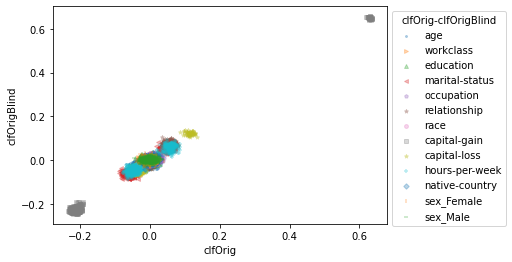

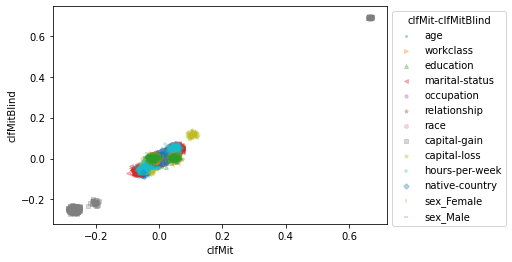

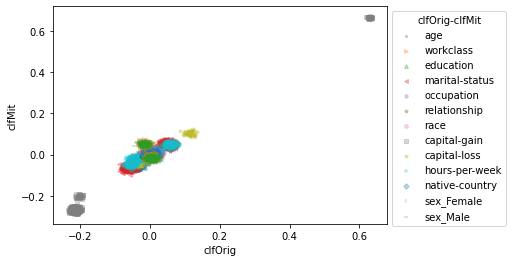

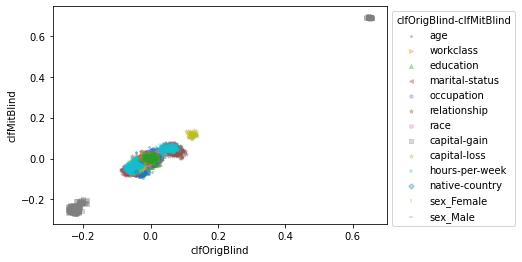

In [121]:
XAIPlots(lime_v,column_names,diffClfs=True)

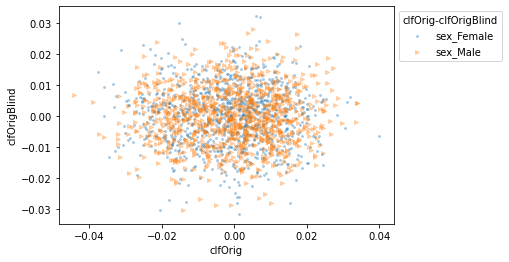

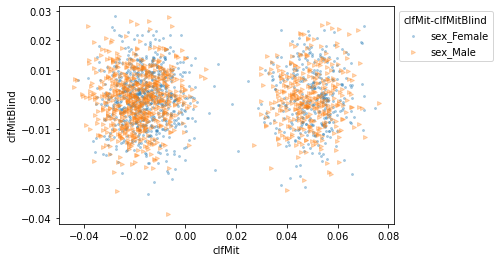

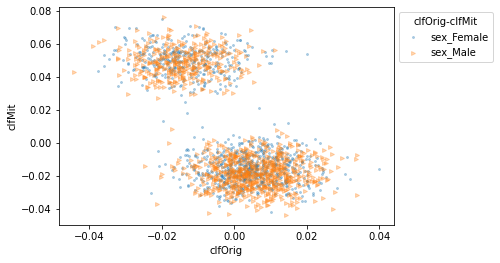

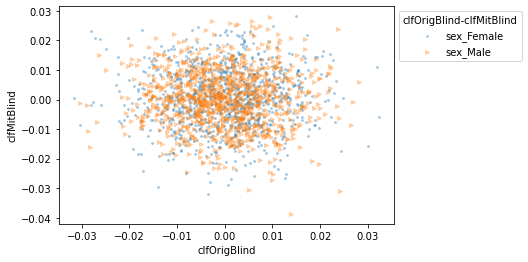

In [122]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [123]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [124]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [125]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                  -34.223910     -50.996017                 -34.613247   
workclass              1.732516       0.273133                   1.296292   
education            -20.432745     -19.257592                 -27.633346   
marital-status       -14.828477     -12.905902                 -15.912391   
occupation            29.835826      17.984848                  29.867734   
relationship         113.646105      92.447639                 118.902456   
race                  -0.230499       0.484007                  -0.129606   
capital-gain        -232.038901    -295.353747                -269.302802   
capital-loss         -47.832503     -59.540463                 -50.171488   
hours-per-week       -12.316715      -5.172683                 -14.298950   
native-country         0.880126      -0.124824                   1.226438   
sex_Female             2.227171      18.006594                  -0.010165   
sex_Male               3.389230      13.694475                  -0.021381   

                clfMitBlind-clfMitBlind  
age                          -61.575547  
workclass                      1.477748  
education                    -23.729766  
marital-status                -7.793959  
occupation                    21.697419  
relationship                  96.573654  
race                           0.338329  
capital-gain                -293.968814  
capital-loss                 -59.277953  
hours-per-week                -4.262530  
native-country                 0.163641  
sex_Female                    -0.001705  
sex_Male                       0.009127

In [126]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.001259       0.001455                   0.001124   
workclass              0.000169       0.000267                   0.000207   
education              0.002726       0.003460                   0.002999   
marital-status         0.002956       0.002701                   0.002115   
occupation             0.001545       0.000529                   0.000462   
relationship           0.001330       0.002719                   0.004544   
race                   0.000178       0.000232                   0.000220   
capital-gain           0.006790       0.009052                   0.002576   
capital-loss           0.004625       0.003093                   0.001843   
hours-per-week         0.000982       0.000865                   0.001033   
native-country         0.000155       0.000195                   0.000170   
sex_Female             0.000279       0.001317                   0.000164   
sex_Male               0.000288       0.003553                   0.000170   

                clfMitBlind-clfMitBlind  
age                            0.003062  
workclass                      0.000248  
education                      0.002535  
marital-status                 0.001927  
occupation                     0.002469  
relationship                   0.002091  
race                           0.000195  
capital-gain                   0.007316  
capital-loss                   0.001323  
hours-per-week                 0.001249  
native-country                 0.000184  
sex_Female                     0.000154  
sex_Male                       0.000164

In [127]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           2.808200      15.850535                   0.015773   
SA-Mean          0.000284       0.002435                   0.000167   
NSA-Sum         46.181666      50.412805                  51.214068   
NSA-Mean         0.002065       0.002234                   0.001572   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.005416  
SA-Mean                  0.000159  
NSA-Sum                 51.896305  
NSA-Mean                 0.002054

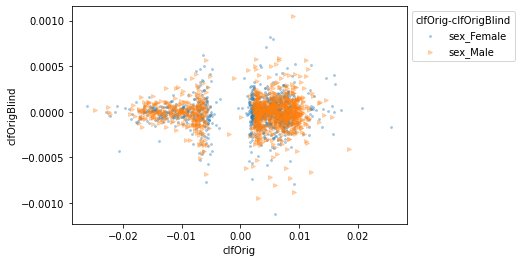

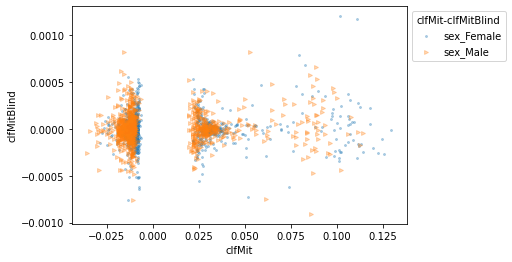

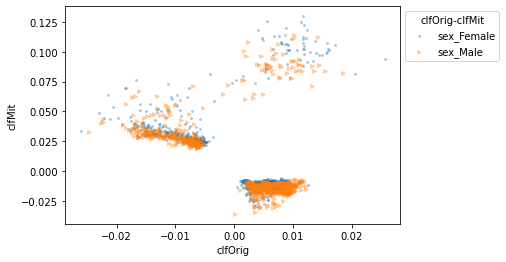

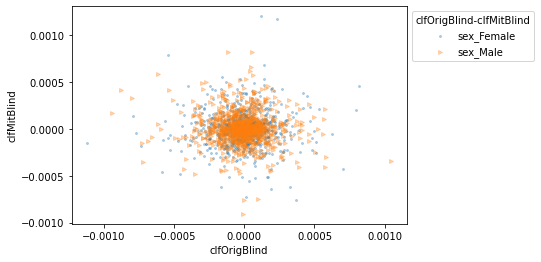

In [128]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [129]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [130]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [131]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                   -0.238080      -7.656746                  -1.934335   
workclass              0.424797      -0.107366                   0.464565   
education             -0.054408      -3.725374                   0.334365   
marital-status        12.720256       4.215528                  18.013638   
occupation            -0.794332      -1.642255                  -1.285928   
relationship         -27.187513       6.921175                 -22.982418   
race                   0.330481       0.168104                   0.288020   
capital-gain          -4.395426     -11.935298                  -4.916796   
capital-loss           2.783863       3.714210                   3.097199   
hours-per-week         0.813703       0.422178                   0.689653   
native-country        -0.102199      -0.182545                  -0.060543   
sex_Female             4.058812      -2.186324                   0.000000   
sex_Male               3.868608      -3.553687                   0.000000   

                clfMitBlind-clfMitBlind  
age                           -7.074894  
workclass                      0.103212  
education                     -4.130139  
marital-status                 5.254385  
occupation                    -1.426658  
relationship                   4.475043  
race                           0.062839  
capital-gain                 -14.118287  
capital-loss                   4.084774  
hours-per-week                -1.555419  
native-country                -0.135461  
sex_Female                     0.000000  
sex_Male                       0.000000

In [132]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                         0.0            0.0                        0.0   
workclass                   0.0            0.0                        0.0   
education                   0.0            0.0                        0.0   
marital-status              0.0            0.0                        0.0   
occupation                  0.0            0.0                        0.0   
relationship                0.0            0.0                        0.0   
race                        0.0            0.0                        0.0   
capital-gain                0.0            0.0                        0.0   
capital-loss                0.0            0.0                        0.0   
hours-per-week              0.0            0.0                        0.0   
native-country              0.0            0.0                        0.0   
sex_Female                  0.0            0.0                        0.0   
sex_Male                    0.0            0.0                        0.0   

                clfMitBlind-clfMitBlind  
age                                 0.0  
workclass                           0.0  
education                           0.0  
marital-status                      0.0  
occupation                          0.0  
relationship                        0.0  
race                                0.0  
capital-gain                        0.0  
capital-loss                        0.0  
hours-per-week                      0.0  
native-country                      0.0  
sex_Female                          0.0  
sex_Male                            0.0

In [133]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           3.963710       2.870006                   0.000000   
SA-Mean          0.000000       0.000000                   0.000000   
NSA-Sum          4.531369       3.699162                   4.915224   
NSA-Mean         0.000000       0.000000                   0.000000   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.000000  
SA-Mean                  0.000000  
NSA-Sum                  3.856465  
NSA-Mean                 0.000000

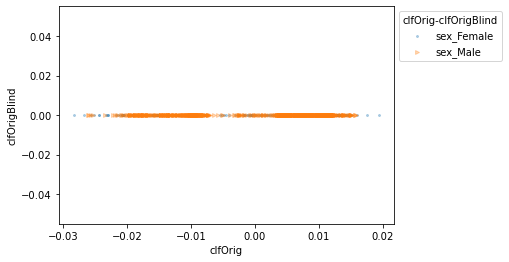

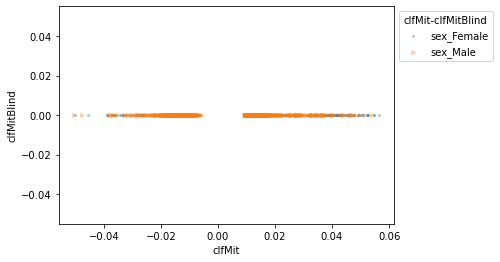

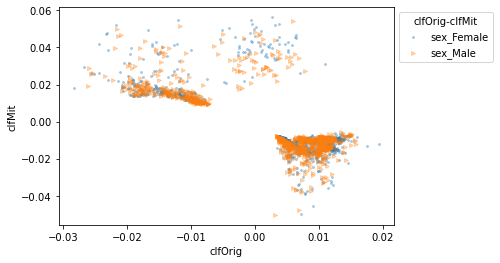

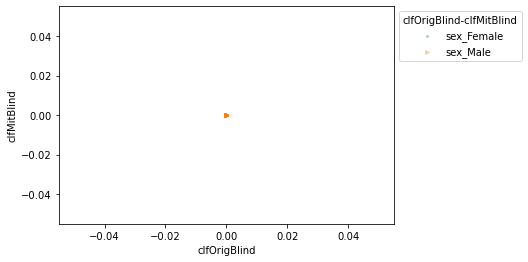

In [134]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [135]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [136]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [137]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                  -29.817526     -39.826935                 -26.352829   
workclass             -1.283508       0.361881                  -1.099935   
education            -11.579214      -8.934656                  -5.099649   
marital-status         1.972105       6.548404                   9.080554   
occupation            11.856984       6.106186                   7.980823   
relationship          19.096421      14.179701                  24.073705   
race                   0.827847       1.888904                   1.256534   
capital-gain        -362.754094    -427.003481                -386.105586   
capital-loss         -87.284097     -62.348718                 -69.218869   
hours-per-week       -26.240306     -15.175438                 -30.394705   
native-country         4.355487       1.115317                   4.066252   
sex_Female            -3.526115      14.469411                   0.020342   
sex_Male              -2.053105      10.802327                  -0.292864   

                clfMitBlind-clfMitBlind  
age                          -49.873797  
workclass                     -1.818372  
education                     -9.737035  
marital-status                11.483436  
occupation                    11.109343  
relationship                  12.194700  
race                           1.092535  
capital-gain                -420.872168  
capital-loss                 -68.605204  
hours-per-week               -19.057396  
native-country                 1.048815  
sex_Female                     0.824855  
sex_Male                       0.706435

In [138]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
age                    0.000886       0.007848                   0.000189   
workclass              0.000898       0.002757                   0.000200   
education              0.000855       0.006658                   0.000210   
marital-status         0.000858       0.003747                   0.000198   
occupation             0.000832       0.003740                   0.000198   
relationship           0.000916       0.007915                   0.000198   
race                   0.000868       0.003093                   0.000188   
capital-gain           0.002969       0.028441                   0.000182   
capital-loss           0.025413       0.012084                   0.002922   
hours-per-week         0.000892       0.002818                   0.000207   
native-country         0.000861       0.006613                   0.000178   
sex_Female             0.000830       0.003098                   0.000197   
sex_Male               0.000840       0.003193                   0.000192   

                clfMitBlind-clfMitBlind  
age                            0.005029  
workclass                      0.002653  
education                      0.008106  
marital-status                 0.002157  
occupation                     0.002904  
relationship                   0.009740  
race                           0.002073  
capital-gain                   0.003140  
capital-loss                   0.016254  
hours-per-week                 0.002731  
native-country                 0.002663  
sex_Female                     0.002346  
sex_Male                       0.002624

In [139]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum           2.789610      12.635869                   0.156603   
SA-Mean          0.000835       0.003146                   0.000195   
NSA-Sum         50.642508      53.044511                  51.339040   
NSA-Mean         0.003295       0.007792                   0.000443   

          clfMitBlind-clfMitBlind  
SA-Sum                   0.765645  
SA-Mean                  0.002485  
NSA-Sum                 55.172073  
NSA-Mean                 0.005223

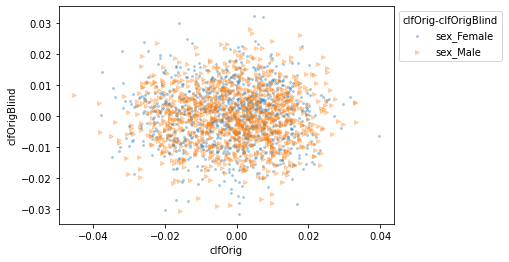

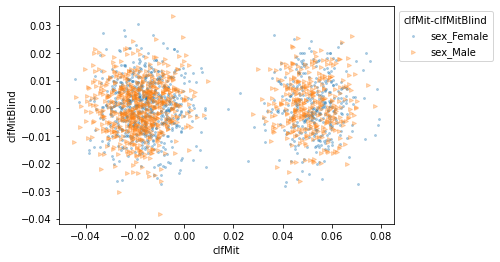

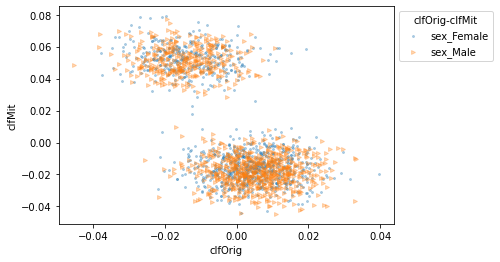

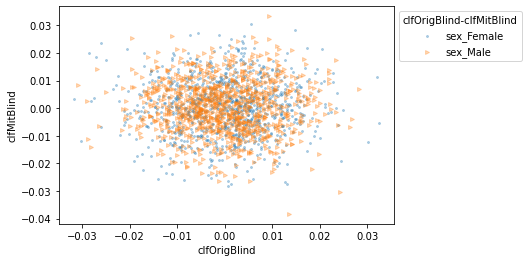

In [140]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)